# GOLD ATLANTIS : Repaying the credit

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sb

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("DS1_C5_S4_Credit_Datas_Hackathon.csv")
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


# Level 0 Analysis: Understanding Data

In [5]:
# reading first 5 rows
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1


In [6]:
# reading the last 5 rows
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2
99999,216090,0,Revolving loans,M,Y,Y,0,202500.0,337500.0,337500.0,...,3230,1,1,1,1,0,Drivers,2.0,SATURDAY,0


In [7]:
# number of rows and columns
df.shape

(100000, 24)

In [8]:
# name of all columns
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

In [9]:
# information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

In [10]:
# checking the null values
df.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

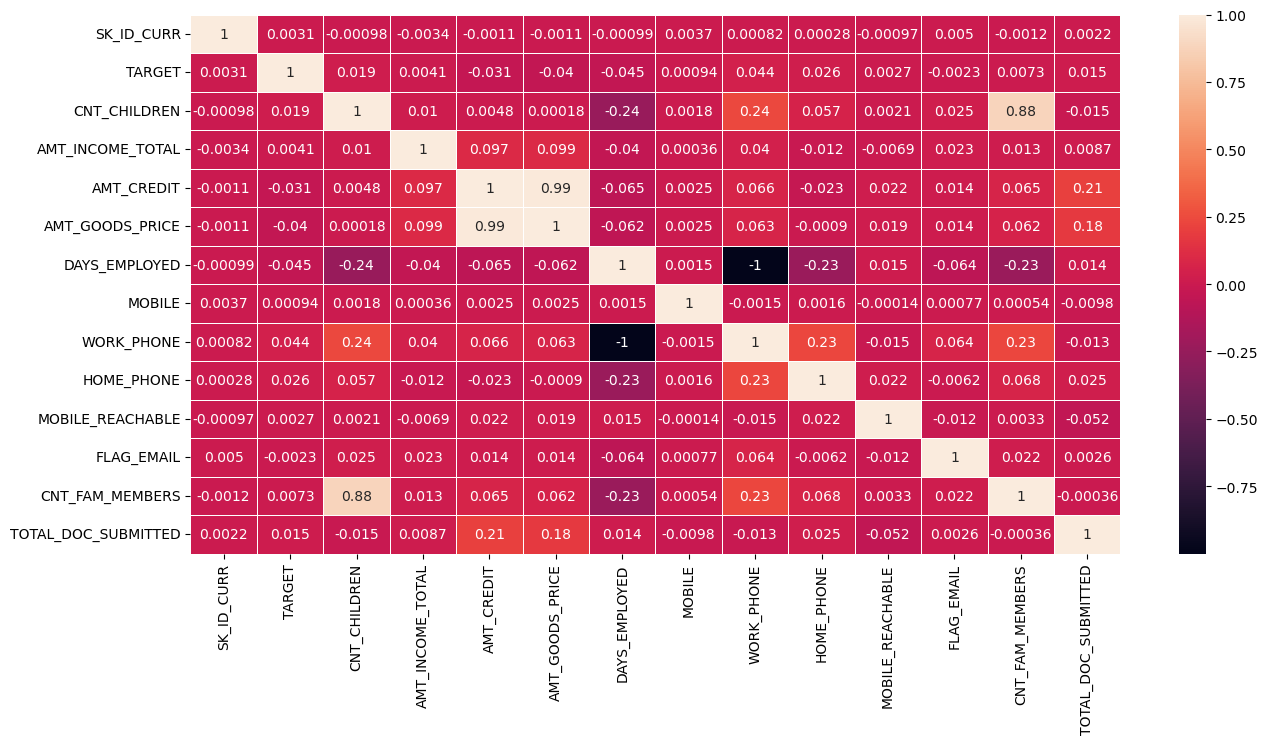

In [11]:
# creating a heat map
fig, ax = plt.subplots(figsize = (15,7))
sb.heatmap(df.corr(), cbar = True, linewidths = 0.5, annot = True)
plt.show()

# LEVEL 1 Analysis

In [12]:
# separating nummerical and categorical data types columns
def sep_data_types(df):
    numerical = []
    categorical = []
    for col in df.columns:
        if df[col].nunique() < 100:
            categorical.append(col)
        else :
            numerical.append(col)
    return categorical, numerical

categorical, numerical = sep_data_types(df)
from tabulate import tabulate
table = [categorical, numerical]
print(tabulate({"categorical" : categorical, 'numerical' :  numerical}, headers = ['categorical', 'numerical']))

categorical          numerical
-------------------  ----------------
TARGET               SK_ID_CURR
NAME_CONTRACT_TYPE   AMT_INCOME_TOTAL
GENDER               AMT_CREDIT
Car                  AMT_GOODS_PRICE
House                DAYS_EMPLOYED
CNT_CHILDREN
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
MOBILE
WORK_PHONE
HOME_PHONE
MOBILE_REACHABLE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
APPLICATION_DAY
TOTAL_DOC_SUBMITTED


In [13]:
# creating function for categorical columns
def info_of_cat(col):
    print(f" unique values in {col} are: {df[col].unique()}")
    print(f" mode of {col} are: {df[col].mode()[0]}")
    print(f" total missing values in {col} are: {df[col].isnull().sum()}")

In [14]:
info_of_cat('TARGET')

 unique values in TARGET are: [1 0]
 mode of TARGET are: 0
 total missing values in TARGET are: 0


In [15]:
info_of_cat('NAME_CONTRACT_TYPE')

 unique values in NAME_CONTRACT_TYPE are: ['Cash loans' 'Revolving loans']
 mode of NAME_CONTRACT_TYPE are: Cash loans
 total missing values in NAME_CONTRACT_TYPE are: 0


In [16]:
info_of_cat('GENDER')

 unique values in GENDER are: ['M' 'F' 'XNA']
 mode of GENDER are: F
 total missing values in GENDER are: 0


In [17]:
info_of_cat('Car')

 unique values in Car are: ['N' 'Y']
 mode of Car are: N
 total missing values in Car are: 0


In [18]:
info_of_cat('House')

 unique values in House are: ['Y' 'N']
 mode of House are: Y
 total missing values in House are: 0


In [19]:
info_of_cat('CNT_CHILDREN')

 unique values in CNT_CHILDREN are: [ 0  1  2  3  4  7  5  6  8  9 11 12]
 mode of CNT_CHILDREN are: 0
 total missing values in CNT_CHILDREN are: 0


In [20]:
info_of_cat('NAME_TYPE_SUITE')

 unique values in NAME_TYPE_SUITE are: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
 mode of NAME_TYPE_SUITE are: Unaccompanied
 total missing values in NAME_TYPE_SUITE are: 405


In [21]:
# imputing the missing value in NAME_TYPE_SUITE column
df['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace = True)

In [22]:
info_of_cat('NAME_TYPE_SUITE')

 unique values in NAME_TYPE_SUITE are: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
 mode of NAME_TYPE_SUITE are: Unaccompanied
 total missing values in NAME_TYPE_SUITE are: 0


In [23]:
info_of_cat('NAME_INCOME_TYPE')

 unique values in NAME_INCOME_TYPE are: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
 mode of NAME_INCOME_TYPE are: Working
 total missing values in NAME_INCOME_TYPE are: 0


In [24]:
info_of_cat('NAME_EDUCATION_TYPE')

 unique values in NAME_EDUCATION_TYPE are: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
 mode of NAME_EDUCATION_TYPE are: Secondary / secondary special
 total missing values in NAME_EDUCATION_TYPE are: 0


In [25]:
info_of_cat('NAME_FAMILY_STATUS')

 unique values in NAME_FAMILY_STATUS are: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
 mode of NAME_FAMILY_STATUS are: Married
 total missing values in NAME_FAMILY_STATUS are: 0


In [26]:
info_of_cat('MOBILE')

 unique values in MOBILE are: [1 0]
 mode of MOBILE are: 1
 total missing values in MOBILE are: 0


In [27]:
info_of_cat('OCCUPATION_TYPE')

 unique values in OCCUPATION_TYPE are: ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
 mode of OCCUPATION_TYPE are: Laborers
 total missing values in OCCUPATION_TYPE are: 31224


In [28]:
df['OCCUPATION_TYPE'].fillna('Laborers', inplace = True)

In [29]:
info_of_cat('OCCUPATION_TYPE')

 unique values in OCCUPATION_TYPE are: ['Laborers' 'Core staff' 'Accountants' 'Managers' 'Drivers' 'Sales staff'
 'Cleaning staff' 'Cooking staff' 'Private service staff' 'Medicine staff'
 'Security staff' 'High skill tech staff' 'Waiters/barmen staff'
 'Low-skill Laborers' 'Realty agents' 'Secretaries' 'IT staff' 'HR staff']
 mode of OCCUPATION_TYPE are: Laborers
 total missing values in OCCUPATION_TYPE are: 0


In [30]:
info_of_cat('CNT_FAM_MEMBERS')

 unique values in CNT_FAM_MEMBERS are: [ 1.  2.  3.  4.  5.  6.  9.  7.  8. 10. 13. nan 14.]
 mode of CNT_FAM_MEMBERS are: 2.0
 total missing values in CNT_FAM_MEMBERS are: 1


In [31]:
df['CNT_FAM_MEMBERS'].fillna('2', inplace = True)

In [32]:
info_of_cat('CNT_FAM_MEMBERS')

 unique values in CNT_FAM_MEMBERS are: [1.0 2.0 3.0 4.0 5.0 6.0 9.0 7.0 8.0 10.0 13.0 '2' 14.0]
 mode of CNT_FAM_MEMBERS are: 2.0
 total missing values in CNT_FAM_MEMBERS are: 0


In [33]:
info_of_cat('APPLICATION_DAY')

 unique values in APPLICATION_DAY are: ['WEDNESDAY' 'MONDAY' 'THURSDAY' 'SUNDAY' 'SATURDAY' 'FRIDAY' 'TUESDAY']
 mode of APPLICATION_DAY are: TUESDAY
 total missing values in APPLICATION_DAY are: 0


In [34]:
info_of_cat('TOTAL_DOC_SUBMITTED')

 unique values in TOTAL_DOC_SUBMITTED are: [1 0 2 3 4]
 mode of TOTAL_DOC_SUBMITTED are: 1
 total missing values in TOTAL_DOC_SUBMITTED are: 0


In [35]:
# defininig a function for numerical columns
def info_of_num(col):
    print (f"mean of the {col} is : {df[col].mean()}")
    print(f"median of the {col} is : {df[col].median()}")
    print(f"mode of {col} is : {df[col].mode()[0]}")
    print(f" standard deviation of {col} is : {df[col].std()}")
    print(f"total missing values in {col} is : {df[col].isnull().sum()}")
    

In [36]:
info_of_num('SK_ID_CURR')

mean of the SK_ID_CURR is : 158006.14086
median of the SK_ID_CURR is : 157877.0
mode of SK_ID_CURR is : 100002
 standard deviation of SK_ID_CURR is : 33481.16699608501
total missing values in SK_ID_CURR is : 0


In [37]:
info_of_num('AMT_INCOME_TOTAL')

mean of the AMT_INCOME_TOTAL is : 169426.07027325002
median of the AMT_INCOME_TOTAL is : 144000.0
mode of AMT_INCOME_TOTAL is : 135000.0
 standard deviation of AMT_INCOME_TOTAL is : 383500.74427718896
total missing values in AMT_INCOME_TOTAL is : 0


In [38]:
info_of_num('AMT_CREDIT')

mean of the AMT_CREDIT is : 599003.4465
median of the AMT_CREDIT is : 513040.5
mode of AMT_CREDIT is : 450000.0
 standard deviation of AMT_CREDIT is : 402051.9591213264
total missing values in AMT_CREDIT is : 0


In [39]:
info_of_num('AMT_GOODS_PRICE')

mean of the AMT_GOODS_PRICE is : 538345.1489706662
median of the AMT_GOODS_PRICE is : 450000.0
mode of AMT_GOODS_PRICE is : 450000.0
 standard deviation of AMT_GOODS_PRICE is : 369397.7246421765
total missing values in AMT_GOODS_PRICE is : 81


In [40]:
df['AMT_GOODS_PRICE'].fillna(450000, inplace = True)

In [41]:
info_of_num('AMT_GOODS_PRICE')

mean of the AMT_GOODS_PRICE is : 538273.5894
median of the AMT_GOODS_PRICE is : 450000.0
mode of AMT_GOODS_PRICE is : 450000.0
 standard deviation of AMT_GOODS_PRICE is : 369256.6403722777
total missing values in AMT_GOODS_PRICE is : 0


In [42]:
info_of_num('DAYS_EMPLOYED')

mean of the DAYS_EMPLOYED is : 67209.10184
median of the DAYS_EMPLOYED is : 2203.0
mode of DAYS_EMPLOYED is : 365243
 standard deviation of DAYS_EMPLOYED is : 139013.1548665735
total missing values in DAYS_EMPLOYED is : 0


# Analysis of number of children client has


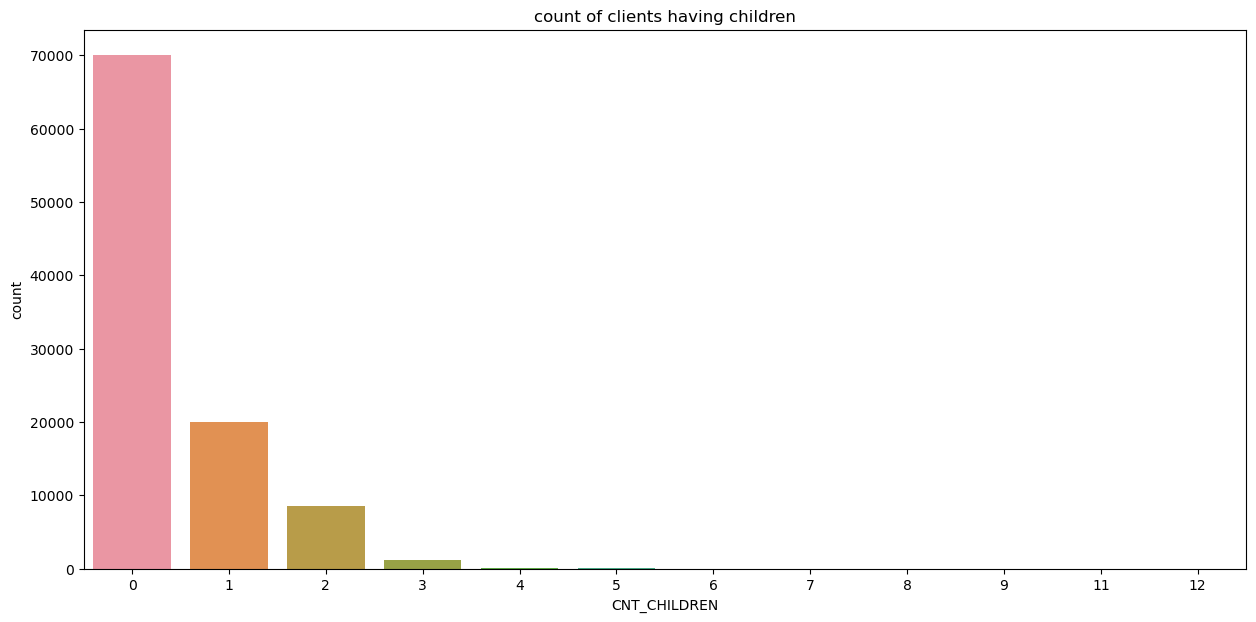

In [43]:
fig, ax = plt.subplots(figsize = (15,7))
sb.countplot(x = df['CNT_CHILDREN'])
plt.title('count of clients having children')
plt.show()

## INTERPRETATION :
* maximum clients do not have children.

# Analysing the clients which provide work phone

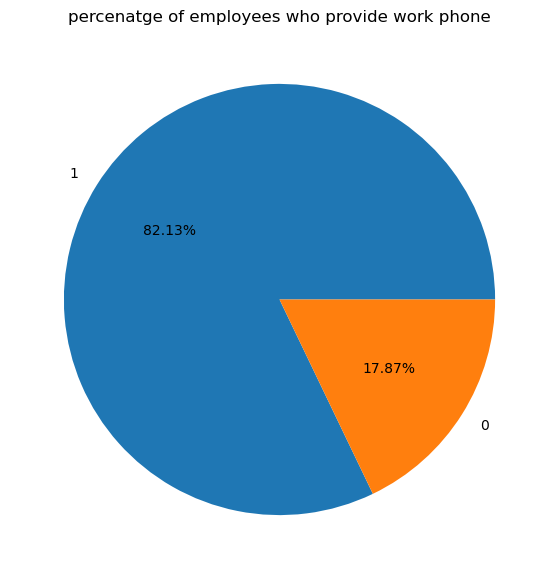

In [44]:
fig, ax = plt.subplots(figsize = (15,7))
data = df['WORK_PHONE'].value_counts()
labels = data.keys()
plt.pie(x = data, labels = labels, autopct = "%0.2f%%")
plt.title('percenatge of employees who provide work phone')
plt.show()

## INTERPRETATION :
* 82.13 % clients provide their work phone.

# Analysing the clients which provide home phone

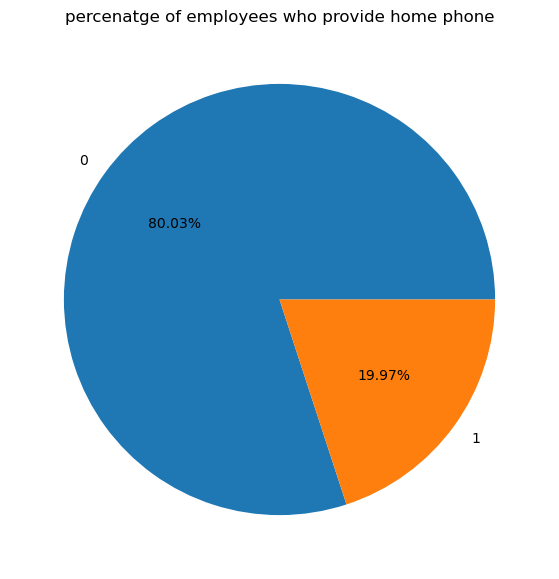

In [45]:
fig, ax = plt.subplots(figsize = (15,7))
data = df['HOME_PHONE'].value_counts()
labels = data.keys()
plt.pie(x = data, labels = labels, autopct = "%0.2f%%")
plt.title('percenatge of employees who provide home phone')
plt.show()

## INTERPRETATION :
* 20% clients provide the home phone.

# analysing count of family members of client


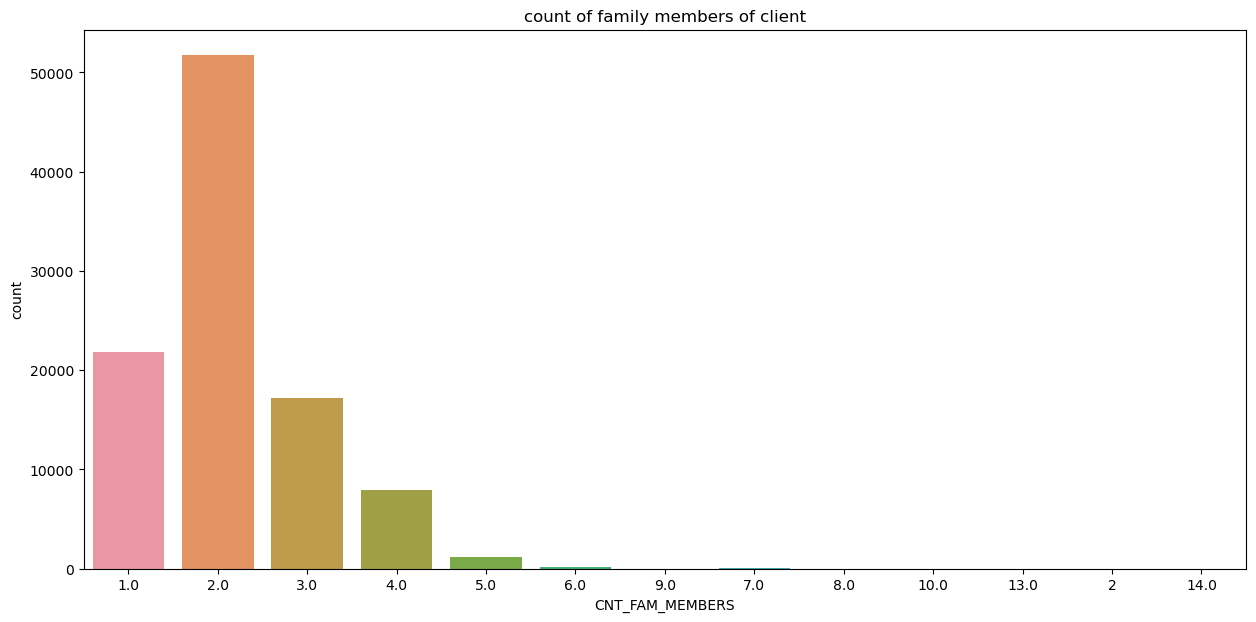

In [46]:
fig, ax = plt.subplots(figsize = (15,7))
sb.countplot(x = df['CNT_FAM_MEMBERS'])
plt.title('count of family members of client')
plt.show()

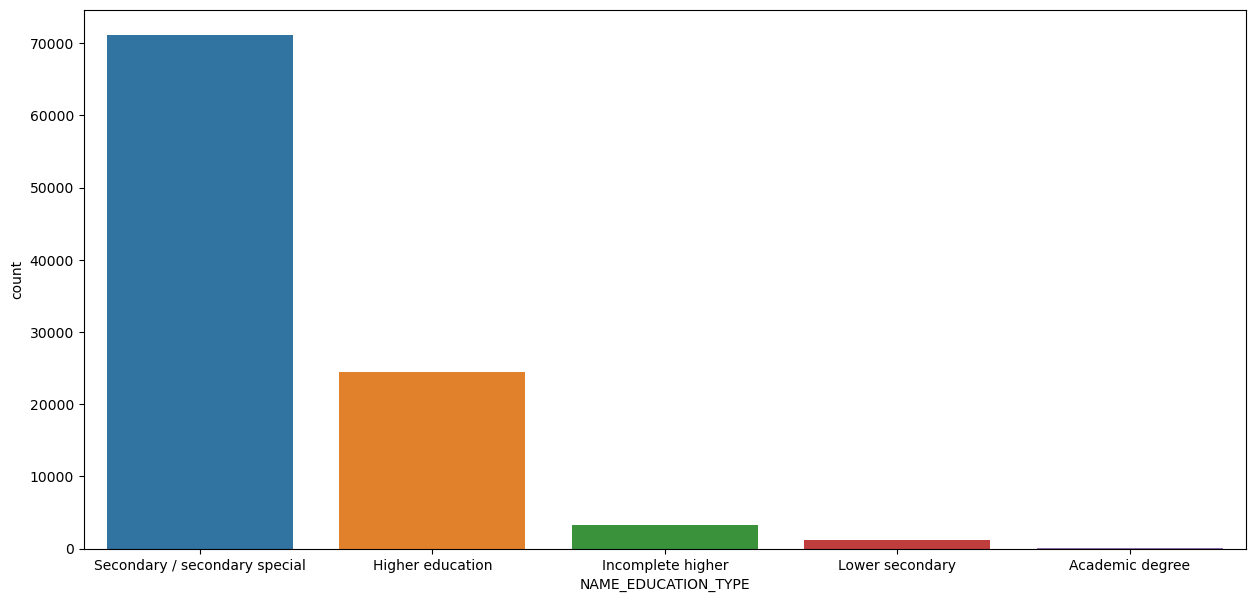

In [49]:
fig, ax = plt.subplots(figsize = (15,7))
sb.countplot(x = df['NAME_EDUCATION_TYPE'])
#plt.title('count of family members of client')
plt.show()

In [48]:
df.columns


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

## INTERPRETATION:
* Maximum clients have 2 family members

# Aanlysing the number of documents submitted by clients

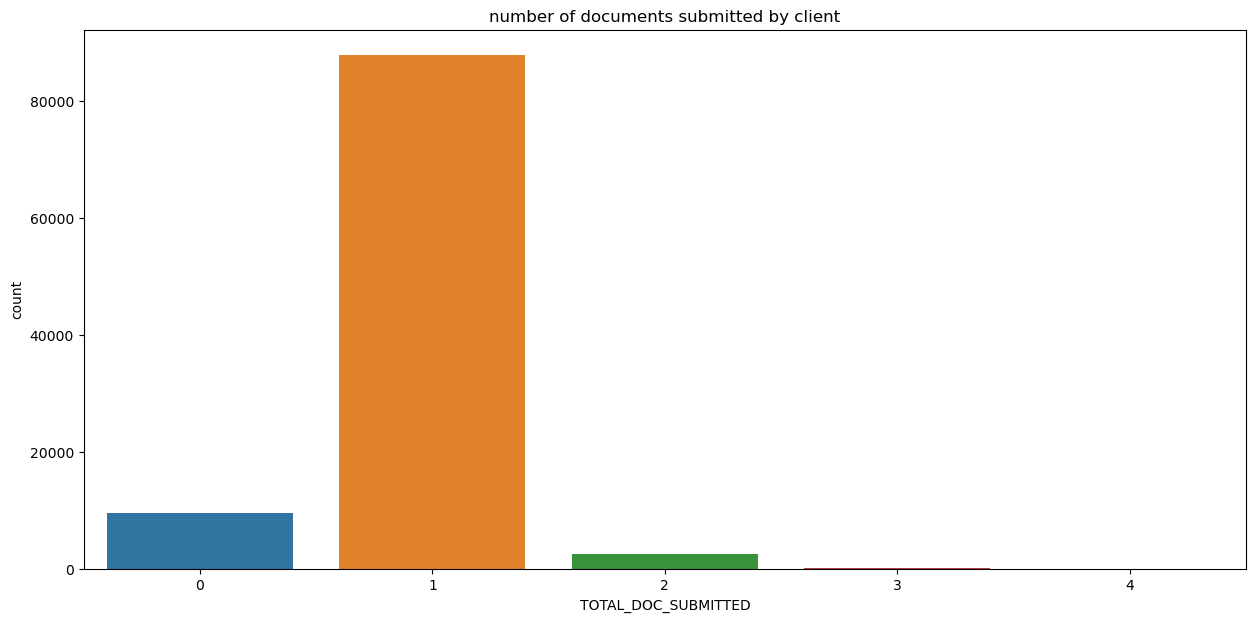

In [46]:
fig, ax = plt.subplots(figsize = (15,7))
sb.countplot(x = df['TOTAL_DOC_SUBMITTED'])
plt.title('number of documents submitted by client')
plt.show()

## INTERPRETATION :
* maximum clients have submitted only 1 document.

# analysing the target variable

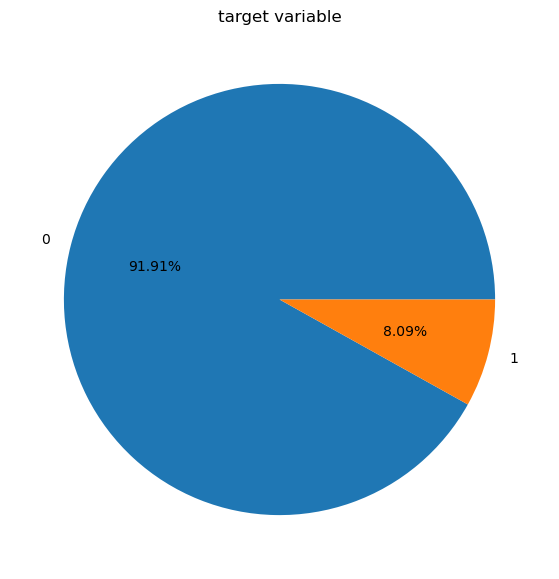

In [47]:
fig, ax = plt.subplots(figsize = (15,7))
data = df['TARGET'].value_counts()
labels = data.keys()
plt.pie(x = data, labels = labels, autopct = "%0.2f%%")
plt.title('target variable')
plt.show()

## INTERPRETATION :
* 8% clients have difficulties with payment.

# analysing the number of days before the application the person started current employment

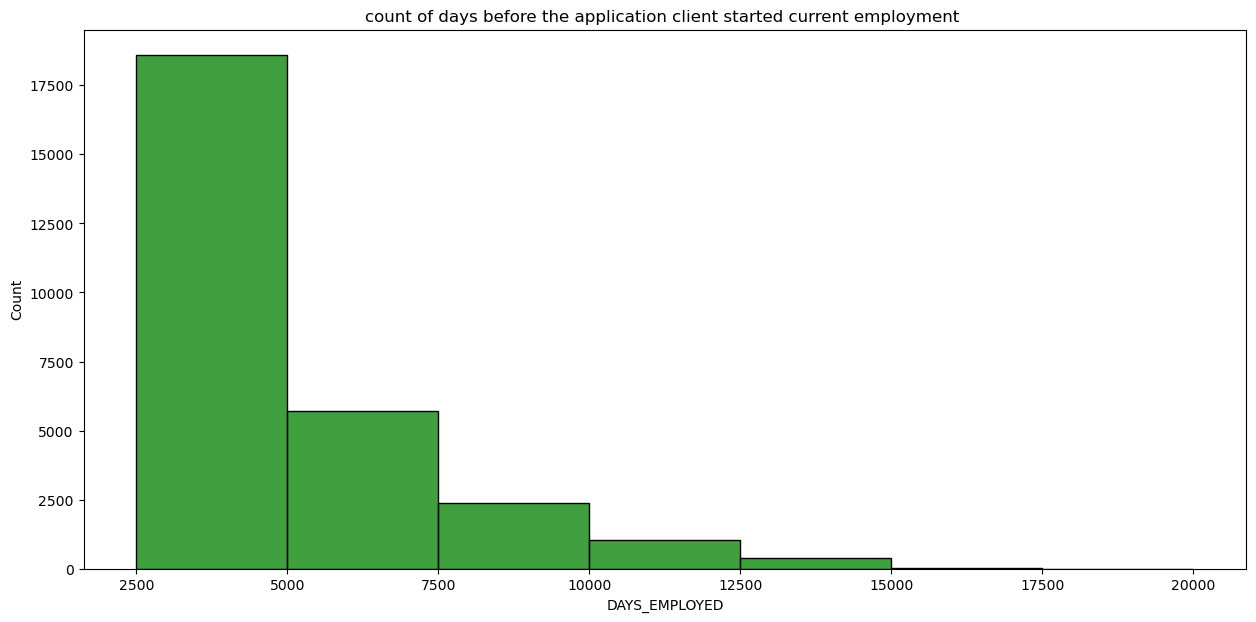

In [48]:
fig, ax = plt.subplots(figsize = (15,7))
sb.histplot(x = 'DAYS_EMPLOYED', data = df, color = 'g', bins = [2500,5000,7500,10000,12500,15000,17500, 20000])
plt.title('count of days before the application client started current employment ')
plt.show()

## INTERPRETATION :
* Maximum employees applied for loan after 2500 to 5000 days of starting the current employment. 

# Analysing the credit amount of loan

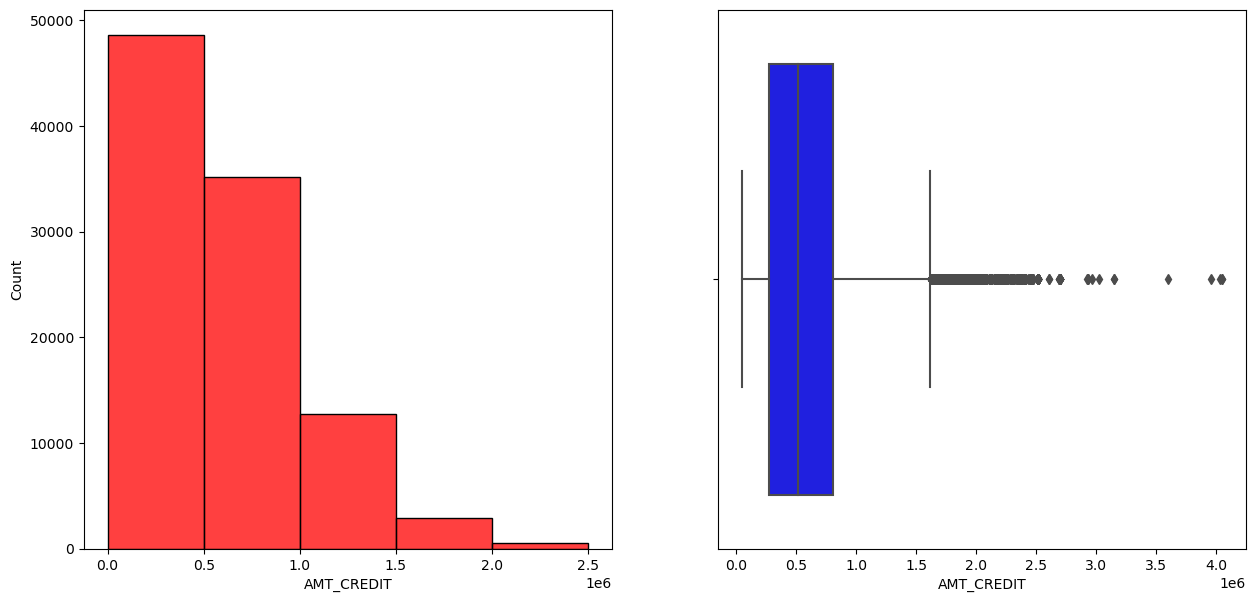

In [49]:
fig, ax = plt.subplots(1,2, figsize = (15,7))
sb.histplot(x = 'AMT_CREDIT', data = df, ax=ax[0], color = 'r', bins = [0,500000,1000000,1500000,2000000, 2500000])
sb.boxplot(x = 'AMT_CREDIT', data = df, ax=ax[1], color = 'b')
plt.show()

## INTERPRETATION :
* Maximum employees have the credit amount less than 5 lacs.
* there are certain outliers which needs to be treated and some outliers are showing a specific pattern.

In [51]:
mean = df['AMT_CREDIT'].mean()
print(mean)

599003.4465


In [52]:
x = df[df['AMT_CREDIT'] > 2500000].index
print(x)

Int64Index([ 1969,  5119,  5246,  7061,  7642,  8094,  8103,  8189,  8940,
             9336,  9850, 10308, 10370, 11216, 13818, 14643, 14852, 15528,
            16714, 16843, 17580, 17948, 20513, 22321, 22514, 22652, 23249,
            23949, 23955, 25447, 27666, 27813, 28615, 30749, 31050, 32099,
            32197, 32231, 36870, 37366, 37773, 42541, 43065, 43424, 44244,
            44336, 45640, 46250, 47031, 47329, 48690, 49236, 50062, 51005,
            51219, 51502, 51750, 53936, 54262, 55176, 55626, 55790, 59711,
            60460, 60805, 64714, 65870, 67665, 68064, 72060, 73280, 74484,
            75664, 76264, 77742, 77949, 81607, 83736, 84791, 86590, 87060,
            87956, 92379, 93163, 93481, 94231, 95121, 95571, 98599, 98646],
           dtype='int64')


In [53]:
for index in x :
    df.loc[index, 'AMT_CREDIT'] = 599003.4465

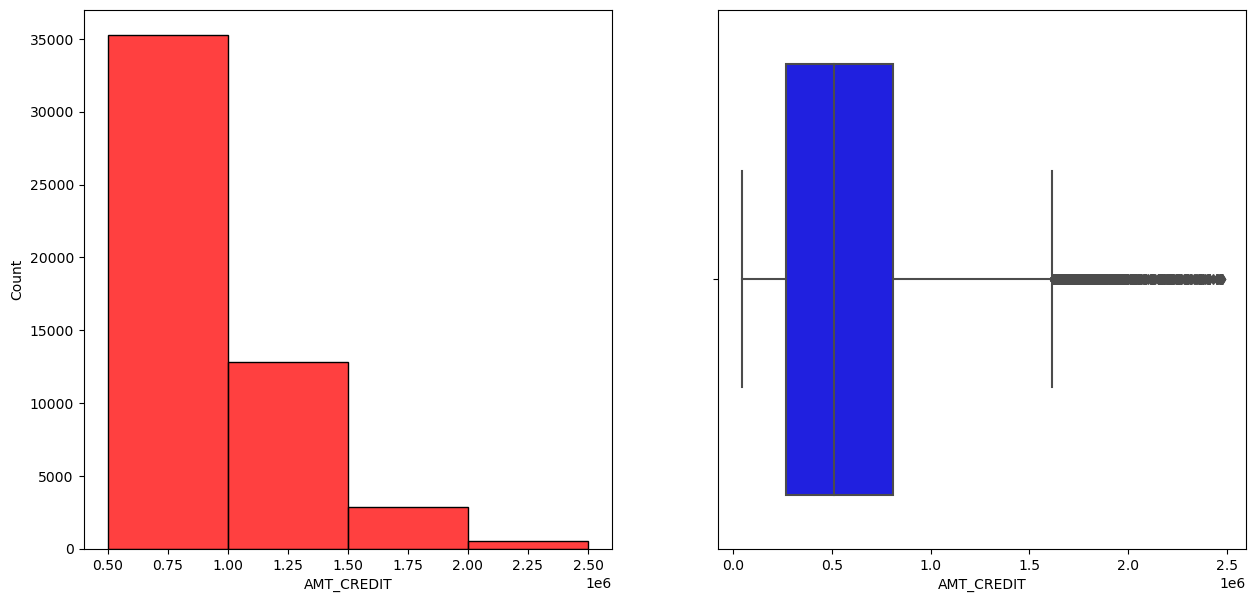

In [54]:
fig, ax = plt.subplots(1,2, figsize = (15,7))
sb.histplot(x = 'AMT_CREDIT', data = df, ax=ax[0], color = 'r', bins = [500000,1000000,1500000,2000000, 2500000])
sb.boxplot(x = 'AMT_CREDIT', data = df, ax=ax[1], color = 'b')
plt.show()

## INTERPRETATION :
* maximum clients have the credit amount less than 10 lakhs.
* there are outliers which are showing. a specific pattern .

# Analysing the good price for consumer loans

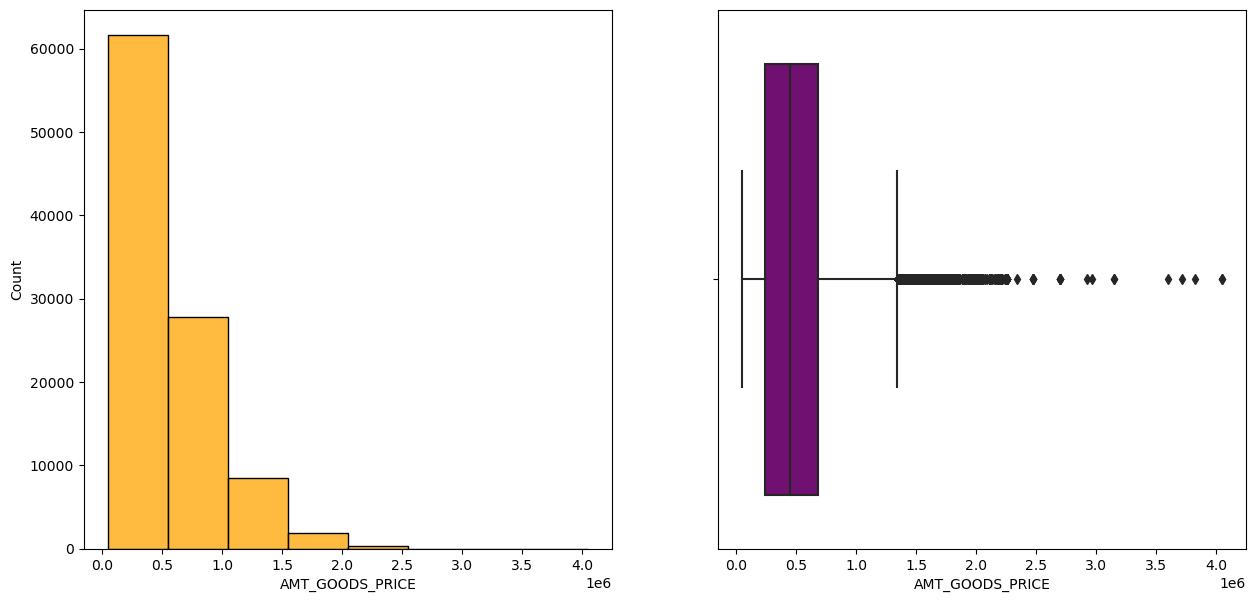

In [55]:
fig, ax = plt.subplots(1,2, figsize = (15,7))
sb.histplot(x = 'AMT_GOODS_PRICE', data = df, ax=ax[0], color = 'orange', bins = 8)
sb.boxplot(x = 'AMT_GOODS_PRICE', data = df, ax=ax[1], color = 'purple')
plt.show()

## INTERPRETATION :
* Maximum clients have good price less than 5 lakhs for consumer loans.
* there are certain outliers which needs to be treated.

In [56]:
# treating the outliers
mean = df['AMT_GOODS_PRICE'].mean()
print(mean)

538273.5894


In [57]:
x = df[df['AMT_GOODS_PRICE'] > 2300000].index
print(x)

Int64Index([ 7642,  8940, 14643, 14852, 16230, 17948, 25447, 25629, 32099,
            45640, 47329, 48690, 53936, 60460, 62299, 64591, 75664, 87060,
            87956, 95571, 98646],
           dtype='int64')


In [60]:
for index in x:
    df.loc[index, 'AMT_GOODS_PRICE'] = 538273.5894

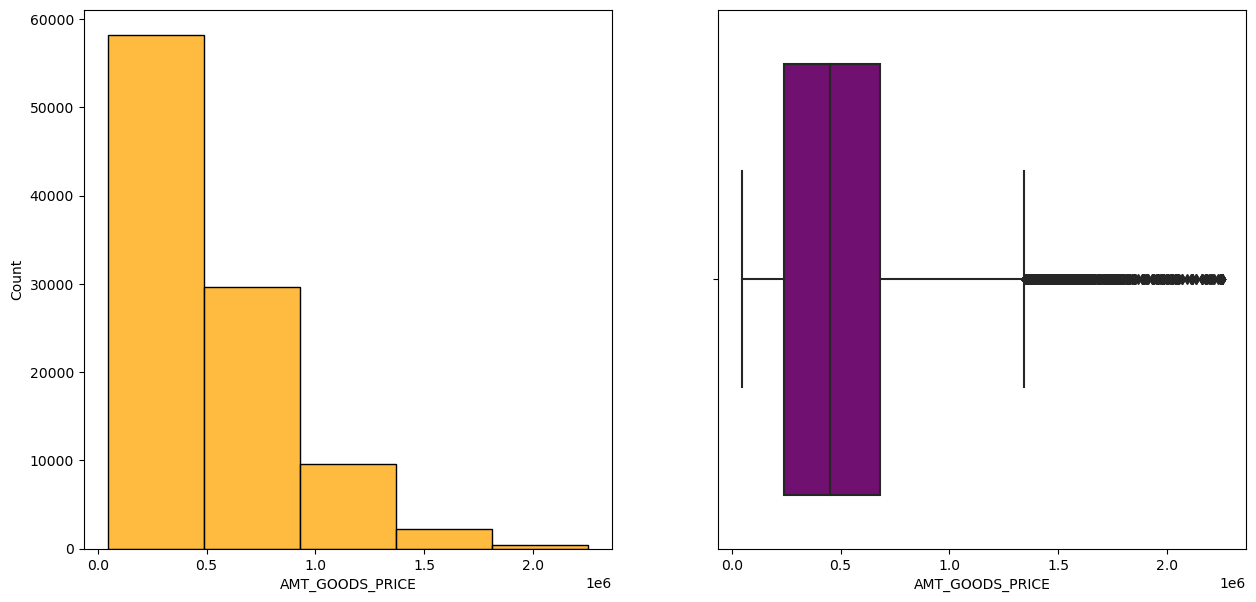

In [61]:
# after outlier treatment
fig, ax = plt.subplots(1,2, figsize = (15,7))
sb.histplot(x = 'AMT_GOODS_PRICE', data = df, ax=ax[0], color = 'orange', bins = 5)
sb.boxplot(x = 'AMT_GOODS_PRICE', data = df, ax=ax[1], color = 'purple')
plt.show()

## INTERPRETATION :
* Maximum clients have good price less than 5 lakhs for consumer loans.
* there are certain outliers which are showing a specific pattern.

# Analysing the income of the client

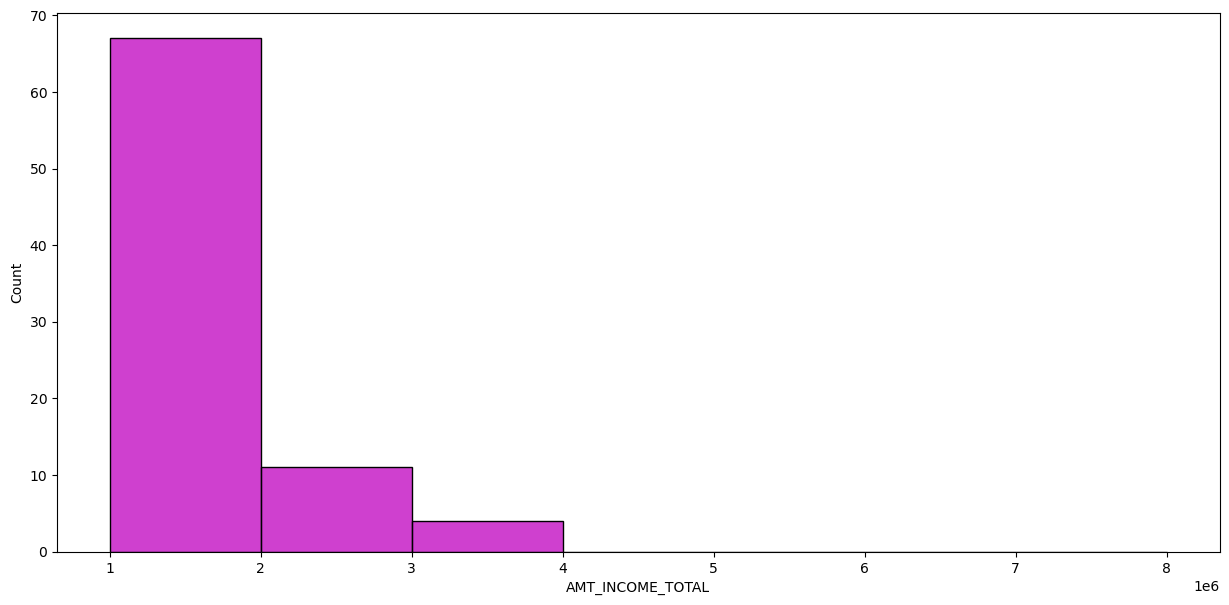

In [65]:
fig, ax = plt.subplots( figsize = (15,7))
sb.histplot(x = 'AMT_INCOME_TOTAL', data = df,  color = 'm', bins = [1000000, 2000000,3000000,4000000,5000000,6000000,7000000,8000000])
plt.show()

## INTERPRETATION :
* maximum clients have income between 10 lakhs and 20 lakhs.

# LEVEL2 : DIVARIATE ANALYSIS

# analysing the count of children and target variable

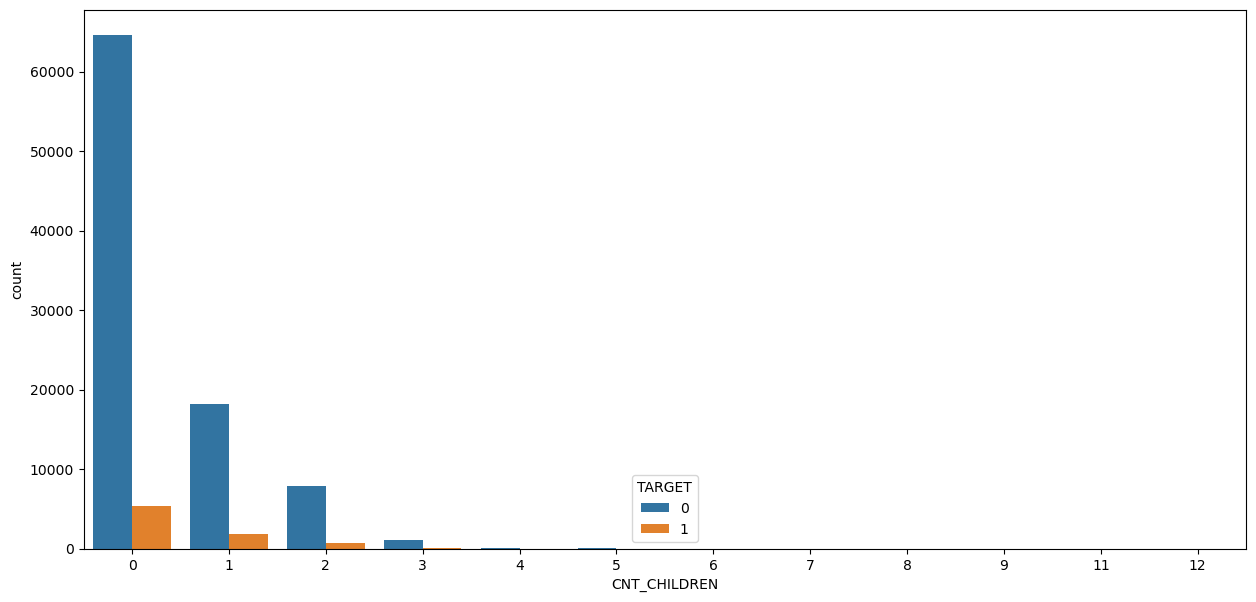

In [66]:
fig, ax = plt.subplots(figsize = (15,7))
sb.countplot(x = df['CNT_CHILDREN'], hue = 'TARGET', data = df)
plt.show()

## INTERPRETATION : 
* maximum clients with 0 payment difficulties have 0 children.
* maximum clients with payment difficulties also have 0 children.

# analysing the target variable with contract type

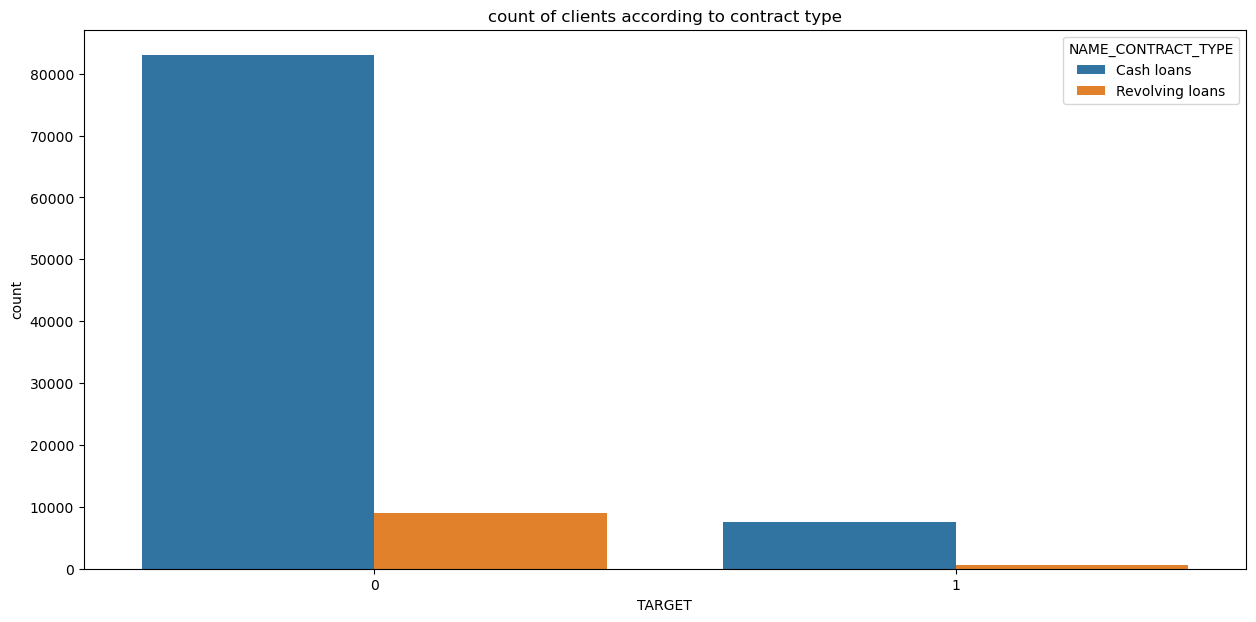

In [67]:
fig, ax = plt.subplots(figsize = (15,7))
sb.countplot(x = df['TARGET'], hue = 'NAME_CONTRACT_TYPE', data = df)
plt.title('count of clients according to contract type')
plt.show()

## INTERPRETATION :
* maximum clients are of cash loans contract type

# analysing the clients having car

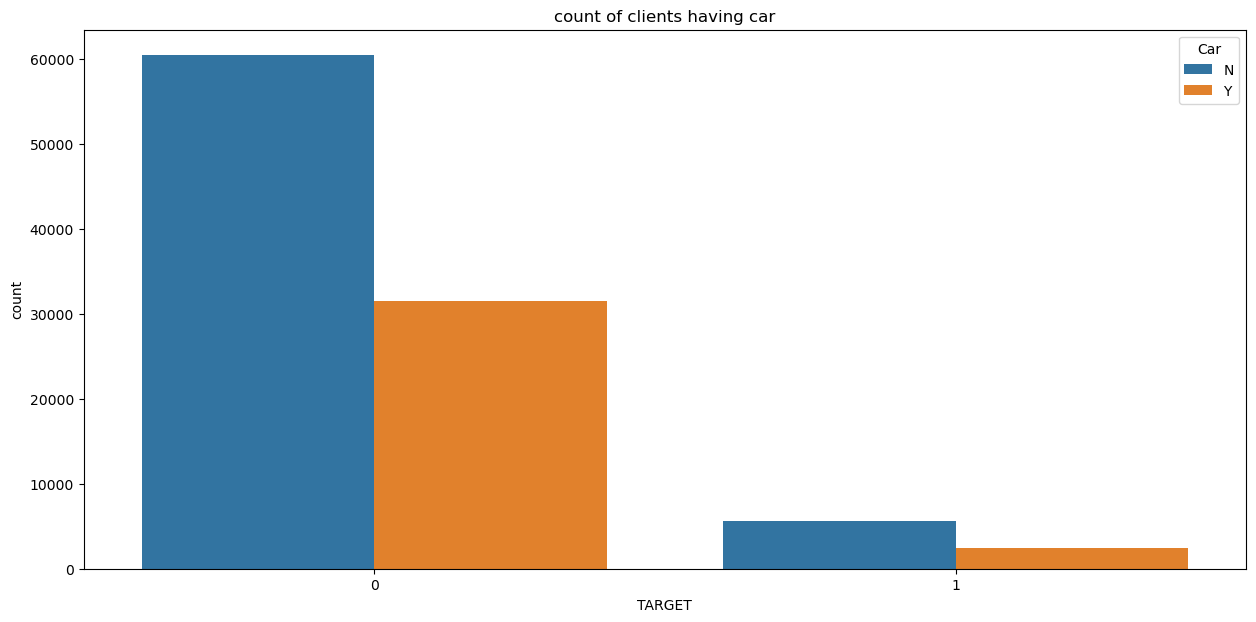

In [68]:
fig, ax = plt.subplots(figsize = (15,7))
sb.countplot(x = df['TARGET'], hue = 'Car', data = df)
plt.title('count of clients having car')
plt.show()

## INTERPRETATION :
* maximum clients have cars.

# analysing the clients having car

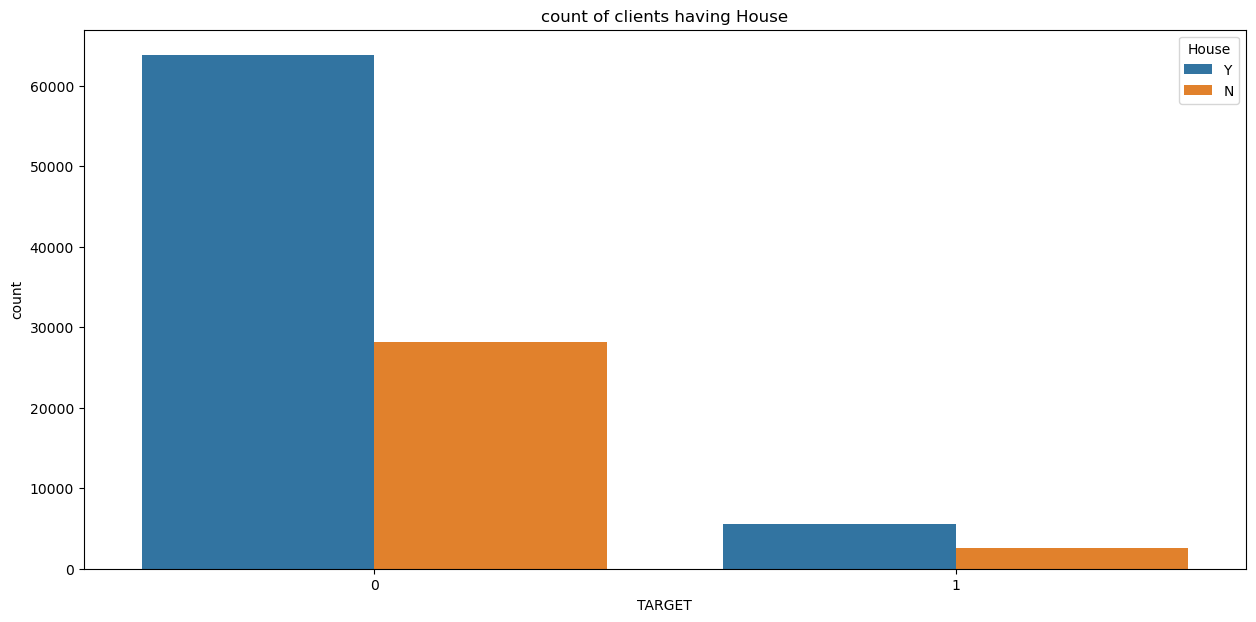

In [72]:
fig, ax = plt.subplots(figsize = (15,7))
sb.countplot(x = df['TARGET'], hue = 'House', data = df)
plt.title('count of clients having House')
plt.show()

## INTERPRETATION :
* Maximum clients have house.

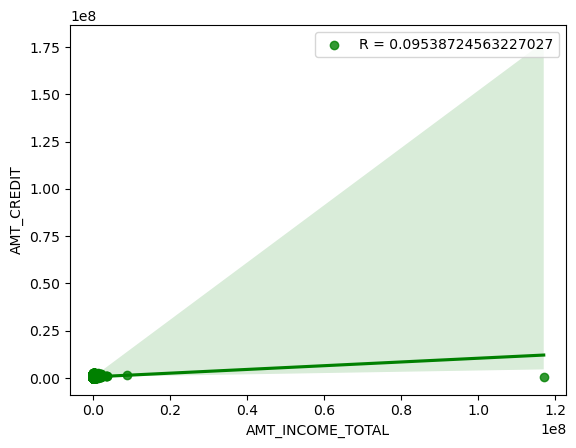

In [73]:
ic_corr = df['AMT_INCOME_TOTAL'].corr(df['AMT_CREDIT'])
sb.regplot(x = df['AMT_INCOME_TOTAL'], y = df['AMT_CREDIT'], label = 'R = ' +str(ic_corr), color = 'g')
plt.legend()
plt.show()

# analysing the total income of client


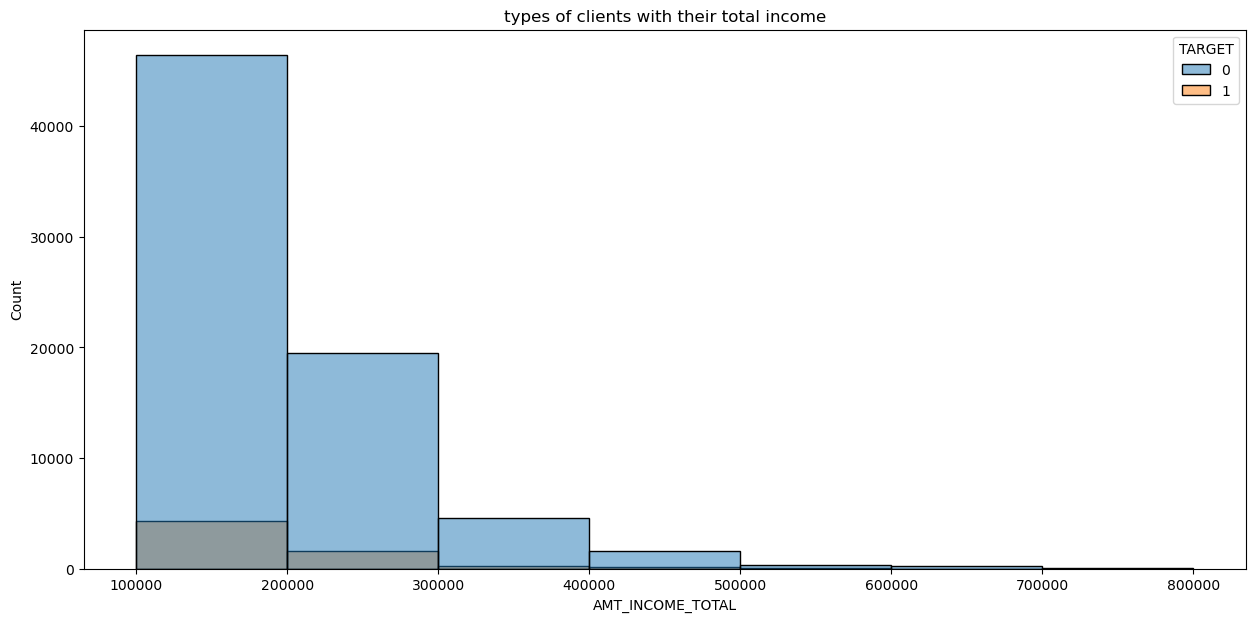

In [92]:
fig, ax = plt.subplots(figsize = (15,7))
sb.histplot(data = df, x = 'AMT_INCOME_TOTAL', hue = 'TARGET', bins = [100000, 200000,300000,400000,500000,600000,700000,800000])
plt.title('types of clients with their total income')
plt.show()

## INTERPRETATION :
* non - defaulters have income between 1lakh and 7 lakhs, but maximum have income between 1 lakh and 2 lakhs.
* defaulters have income between 1 lakh and 3 lakhs.
* non- defaluters having income between 1 and 2 lakhs can also become defaulters.

In [75]:
# calculating the measures of central tendencies
df.groupby(['TARGET'])[['AMT_INCOME_TOTAL']].mean()

,AMT_INCOME_TOTAL
TARGET,
0,168955.936428
1,174765.078216


In [76]:
df.groupby(['TARGET'])[['AMT_INCOME_TOTAL']].median()

,AMT_INCOME_TOTAL
TARGET,
0,148500.0
1,135000.0


In [77]:
df.groupby(['TARGET'])[['AMT_INCOME_TOTAL']].apply(lambda x : x.mode())

,,AMT_INCOME_TOTAL
TARGET,,
0,0,135000.0
1,0,135000.0


# analysing the credit amount of loan with the type of client

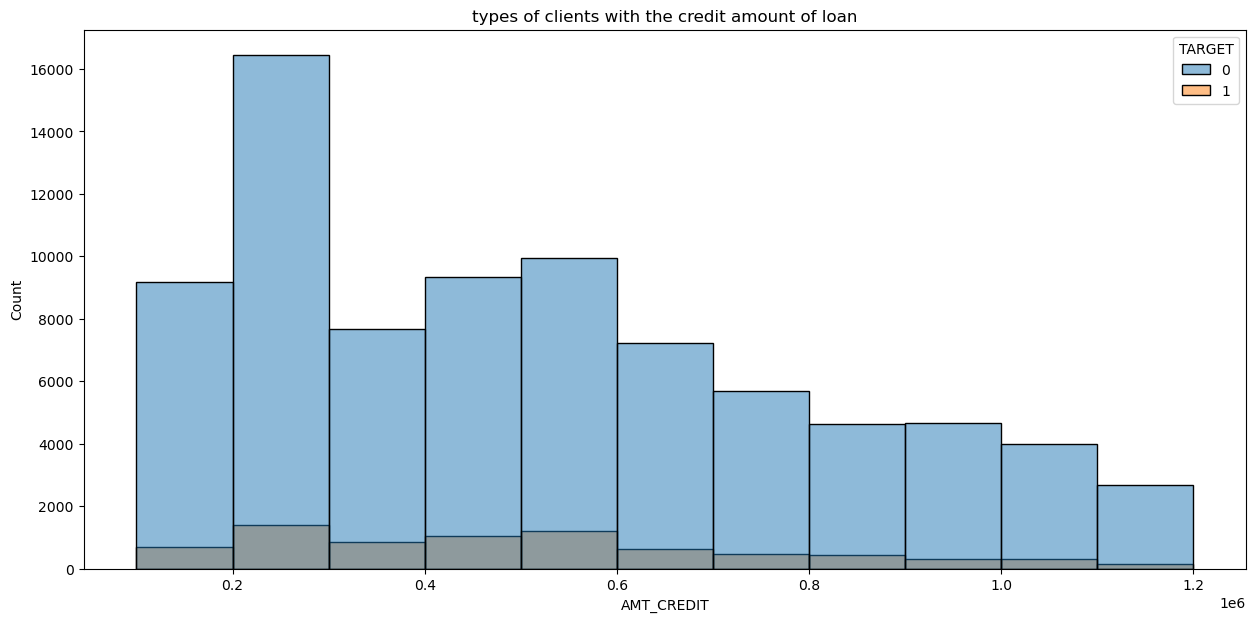

In [95]:
fig, ax = plt.subplots(figsize = (15,7))
sb.histplot(data = df, x = 'AMT_CREDIT', hue = 'TARGET', bins = [100000, 200000,300000,400000,500000,600000,700000,800000,900000,1000000, 1100000,1200000])
plt.title('types of clients with the credit amount of loan')
plt.show()

## INTERPRETATAION :
*  the range of loan amount of non- defaulter clients is 1 lakh to 12 lakhs.
*  the range of loan amount of defaulter clients is 1 lakh to 12 lakhs.



# analysing the target variable with the price of goods

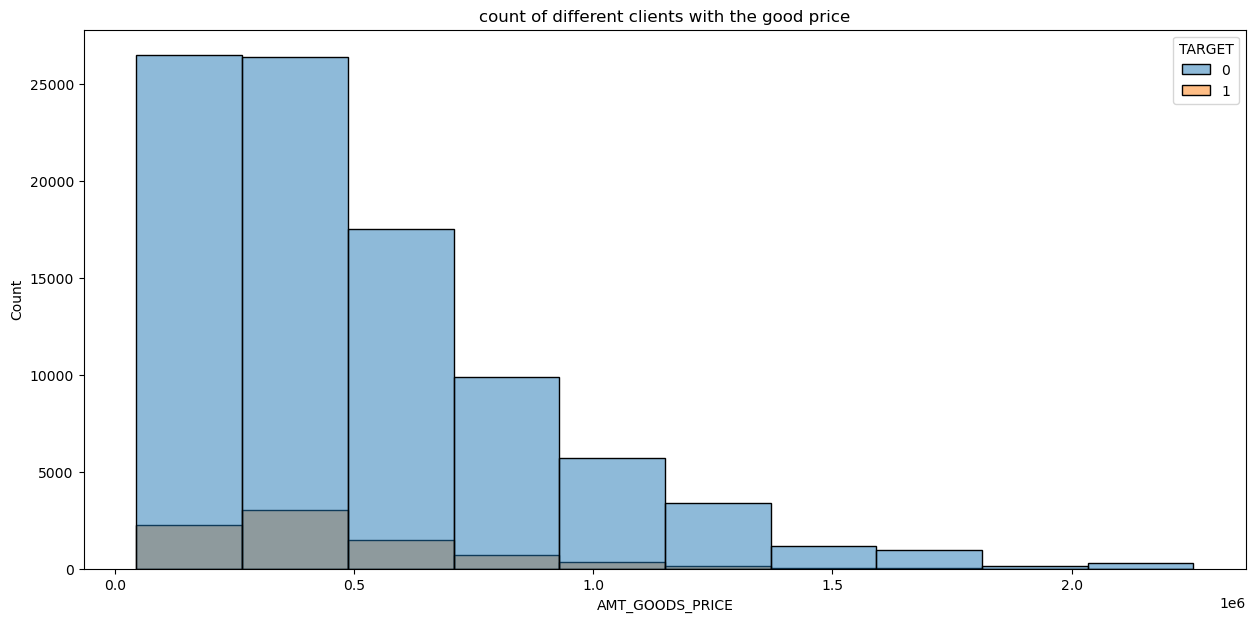

In [79]:
fig, ax = plt.subplots(figsize = (15,7))
sb.histplot(data = df, x = 'AMT_GOODS_PRICE', hue = 'TARGET', bins = 10)
plt.title('count of different clients with the good price')
plt.show()

## INTERPRETATAION :
*  the amount of good price  of maximum non- defaulter clients is 5 less than 5 lakhs 
* the amount of good price of maximum defaulter clients is also less than 5 lakhs.


# analysing the count of clients with their highest education 

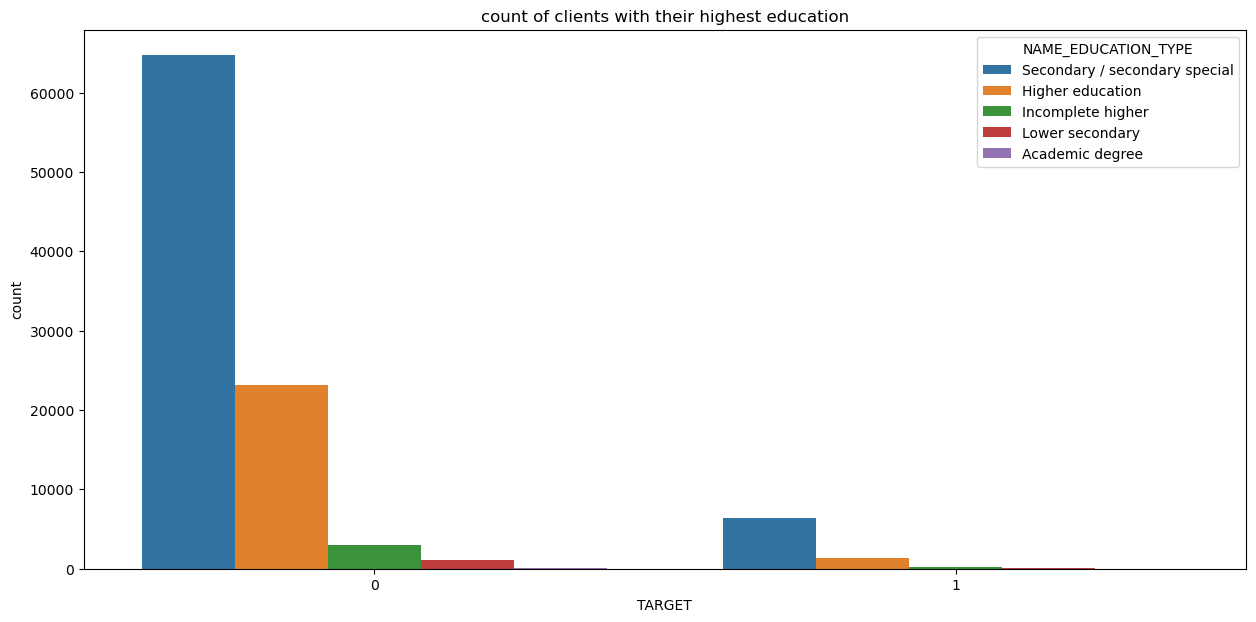

In [80]:
fig, ax = plt.subplots(figsize = (15,7))
sb.countplot(x = df['TARGET'], hue = 'NAME_EDUCATION_TYPE', data = df)
plt.title('count of clients with their highest education')
plt.show()

## INTERPRETATIN :
* maximum clients have secondary/secondary special education.

# analysing count of clients and their family status

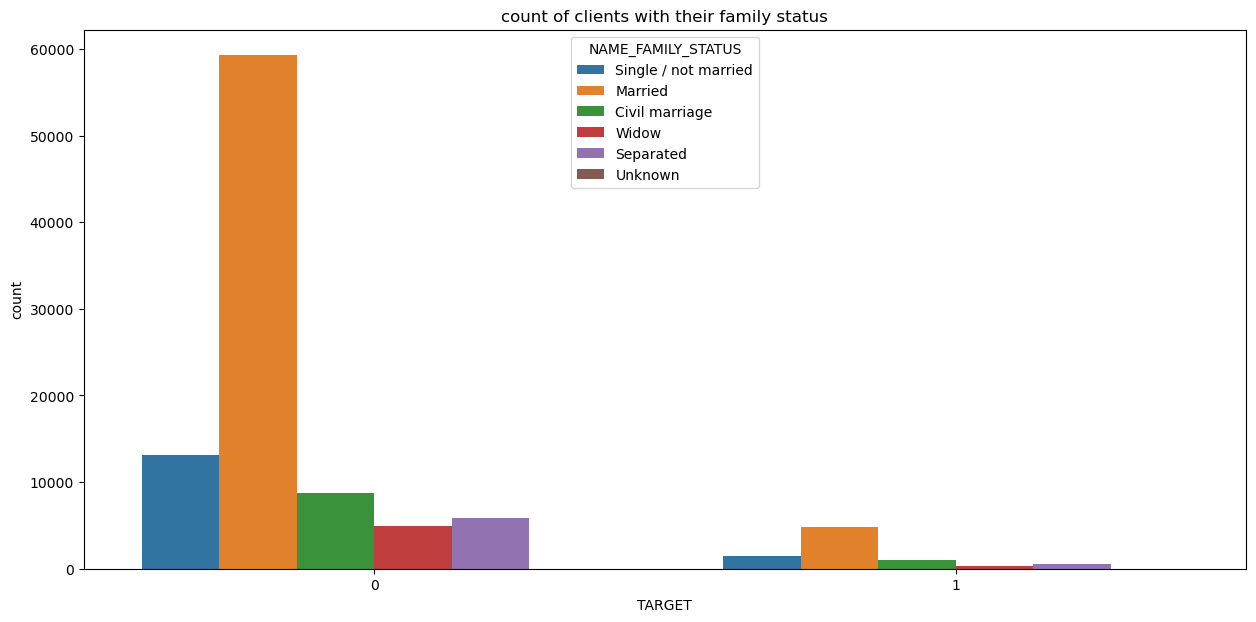

In [81]:
fig, ax = plt.subplots(figsize = (15,7))
sb.countplot(x = df['TARGET'], hue = 'NAME_FAMILY_STATUS', data = df)
plt.title('count of clients with their family status')
plt.show()

# INTERPRETATION :
* maximum clients are married

# analysing target variable with days employed

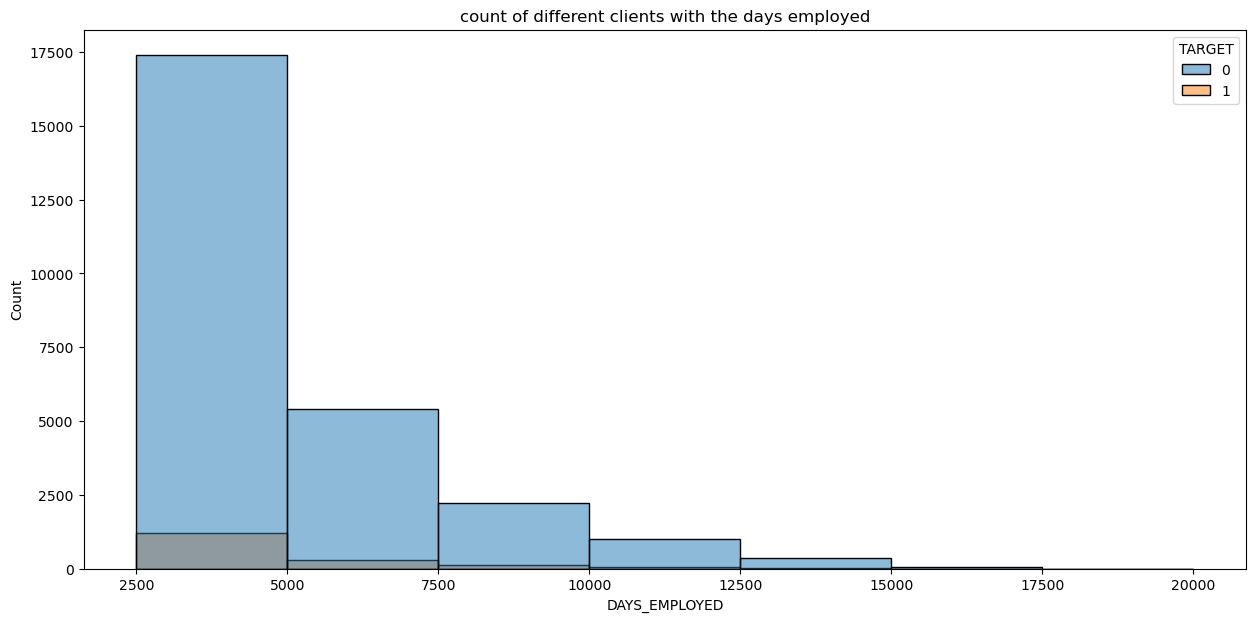

In [82]:
fig, ax = plt.subplots(figsize = (15,7))
sb.histplot(data = df, x = 'DAYS_EMPLOYED', hue = 'TARGET', bins = [2500,5000,7500,10000,12500,15000,17500, 20000])
plt.title('count of different clients with the days employed')
plt.show()

## INTERPRETATION:
* maximum defaulter clients applied for loan after 5000 days.
* maximum non-defaulter clients applied for loan after 5000 days.

# analysing clients and their occupation

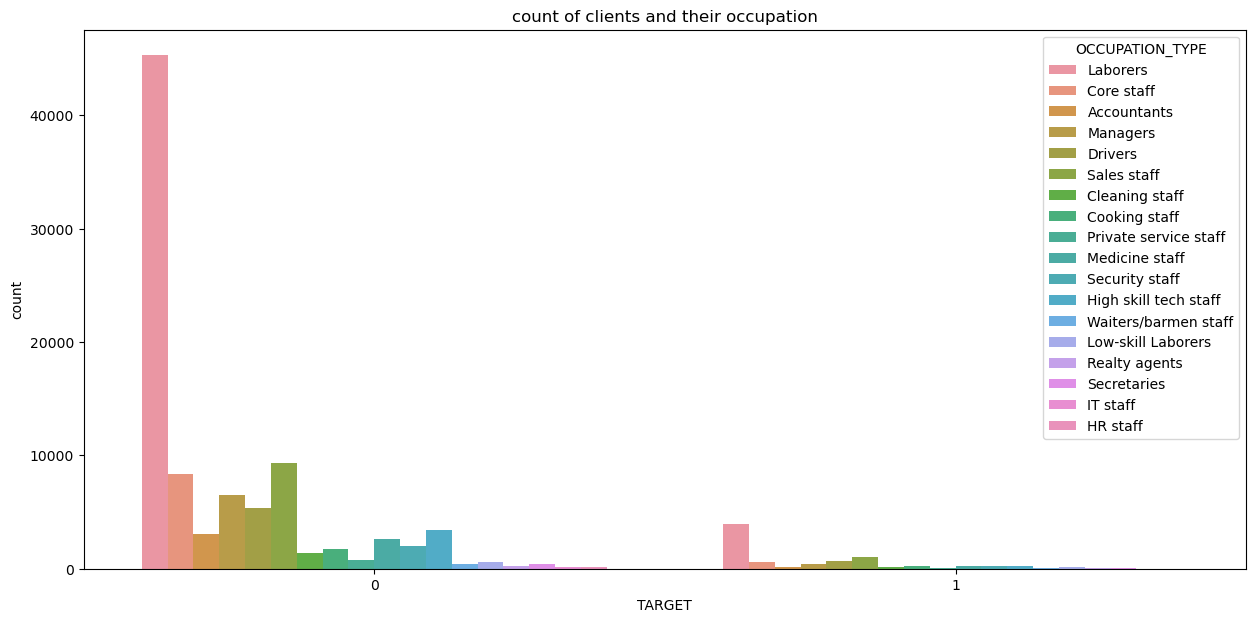

In [83]:
fig, ax = plt.subplots(figsize = (15,7))
sb.countplot(x = df['TARGET'], hue = 'OCCUPATION_TYPE', data = df)
plt.title('count of clients and their occupation')
plt.show()

## INTERPRETATION :
* maximum clients are laborers.

# MULTIVARIATE ANALYSIS

## filtering the following conditions in the data based on bivariate analysis.
* count of children = 0(maximum clients have 0 children)
* maximum clients have secondary/secondary special as highest education 
* maximum clients are married
* maximum clients have labourers as their occupation
* maximum clients have submitted only one document

In [84]:
df_1 = df[(df['CNT_CHILDREN'] == 0)&(df['NAME_EDUCATION_TYPE'] == 'Secondary / secondary special')&
         (df['NAME_FAMILY_STATUS'] == 'Married') & (df['OCCUPATION_TYPE'] == 'Laborers') & 
         (df['TOTAL_DOC_SUBMITTED'] == 1)]
df_1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,454500.0,...,1588,1,1,1,1,0,Laborers,2.0,WEDNESDAY,1
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,913500.0,...,365243,1,0,0,1,0,Laborers,2.0,WEDNESDAY,1
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,135000.0,...,365243,1,0,0,1,0,Laborers,2.0,FRIDAY,1
12,100016,0,Cash loans,F,N,Y,0,67500.000,80865.0,67500.0,...,2717,1,1,1,1,0,Laborers,2.0,FRIDAY,1
14,100018,0,Cash loans,F,N,Y,0,189000.000,773680.5,679500.0,...,203,1,1,0,1,0,Laborers,2.0,MONDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99973,216063,0,Cash loans,F,N,N,0,337500.000,728460.0,675000.0,...,1375,1,1,1,1,0,Laborers,2.0,FRIDAY,1
99981,216072,0,Cash loans,F,N,Y,0,35100.000,294322.5,243000.0,...,365243,1,0,0,1,0,Laborers,2.0,SUNDAY,1
99982,216073,0,Cash loans,F,N,Y,0,108000.000,432661.5,373500.0,...,365243,1,0,0,1,0,Laborers,2.0,WEDNESDAY,1
99989,216080,0,Cash loans,F,N,Y,0,180000.000,1546020.0,1350000.0,...,2250,1,1,0,1,0,Laborers,2.0,MONDAY,1


In [85]:
# filtering the clients which have car and house
df_2 = df_1[(df_1['Car'] == 'Y') & (df_1['House'] == 'Y')]
df_2


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
49,100056,0,Cash loans,M,Y,Y,0,360000.0,1506816.0,1350000.0,...,9523,1,1,0,1,0,Laborers,2.0,THURSDAY,1
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,463500.0,...,892,1,1,0,1,0,Laborers,2.0,MONDAY,1
82,100097,0,Cash loans,M,Y,Y,0,157500.0,760225.5,679500.0,...,2442,1,1,0,1,0,Laborers,2.0,THURSDAY,1
117,100137,0,Cash loans,F,Y,Y,0,225000.0,891072.0,720000.0,...,365243,1,0,0,1,0,Laborers,2.0,FRIDAY,1
125,100146,0,Cash loans,M,Y,Y,0,117000.0,327024.0,270000.0,...,365243,1,0,0,1,0,Laborers,2.0,WEDNESDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99799,215854,0,Cash loans,M,Y,Y,0,108000.0,806193.0,738000.0,...,1655,1,1,0,1,0,Laborers,2.0,MONDAY,1
99859,215929,0,Cash loans,M,Y,Y,0,90000.0,571446.0,477000.0,...,365243,1,0,0,1,0,Laborers,2.0,FRIDAY,1
99948,216034,0,Cash loans,M,Y,Y,0,157500.0,1024740.0,900000.0,...,2302,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
99963,216053,0,Cash loans,F,Y,Y,0,67500.0,544491.0,454500.0,...,365243,1,0,0,1,0,Laborers,2.0,FRIDAY,1


# analysing the the total income and target 


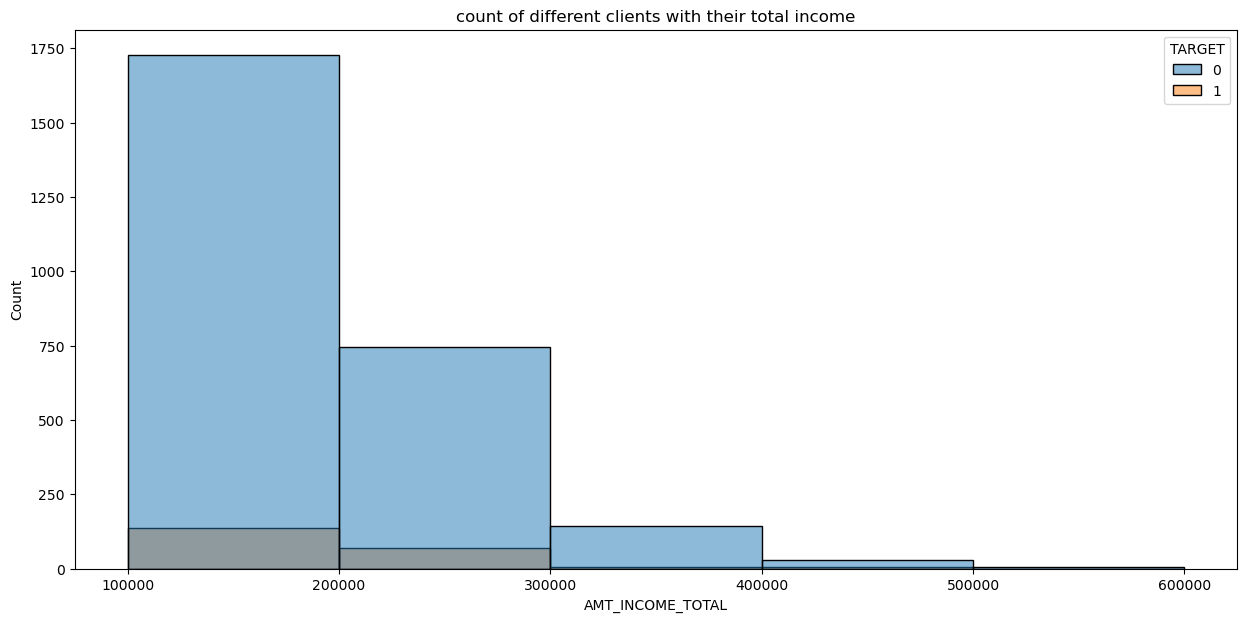

In [89]:
fig, ax = plt.subplots(figsize = (15,7))
sb.histplot(data = df_2, x = 'AMT_INCOME_TOTAL', hue = 'TARGET', bins = [100000,200000,300000,400000,500000, 600000])
plt.title('count of different clients with their total income')
plt.show()

## INTERPRETATION :
clients having both car and house
 * the non - defaulter clients have income between 1 lakhs and 6 lakhs.
 * the defaulter clients have income between 1 lakhs and 3 lakhs .
 * the non-defaulter clients having total income between 1 lakhs and 2 lakhs can also become the defaulter.

In [87]:
df_2.groupby(['TARGET'])[['AMT_INCOME_TOTAL']].mean()

,AMT_INCOME_TOTAL
TARGET,
0,165933.254534
1,173051.946429


In [90]:
df_2.groupby(['TARGET'])[['AMT_INCOME_TOTAL']].median()

,AMT_INCOME_TOTAL
TARGET,
0,157500.0
1,157500.0


In [91]:
df_2.groupby(['TARGET'])[['AMT_INCOME_TOTAL']].apply(lambda x : x.mode())

,,AMT_INCOME_TOTAL
TARGET,,
0,0,135000.0
1,0,135000.0


# filtering the clients having total income between 2 lakhs and 8 lakhs

df_3 = df_2[(df_2['AMT_INCOME_TOTAL'] >= 200000) & (df_2['AMT_INCOME_TOTAL'] <= 800000)]
df_3

# analysing target and credit amount

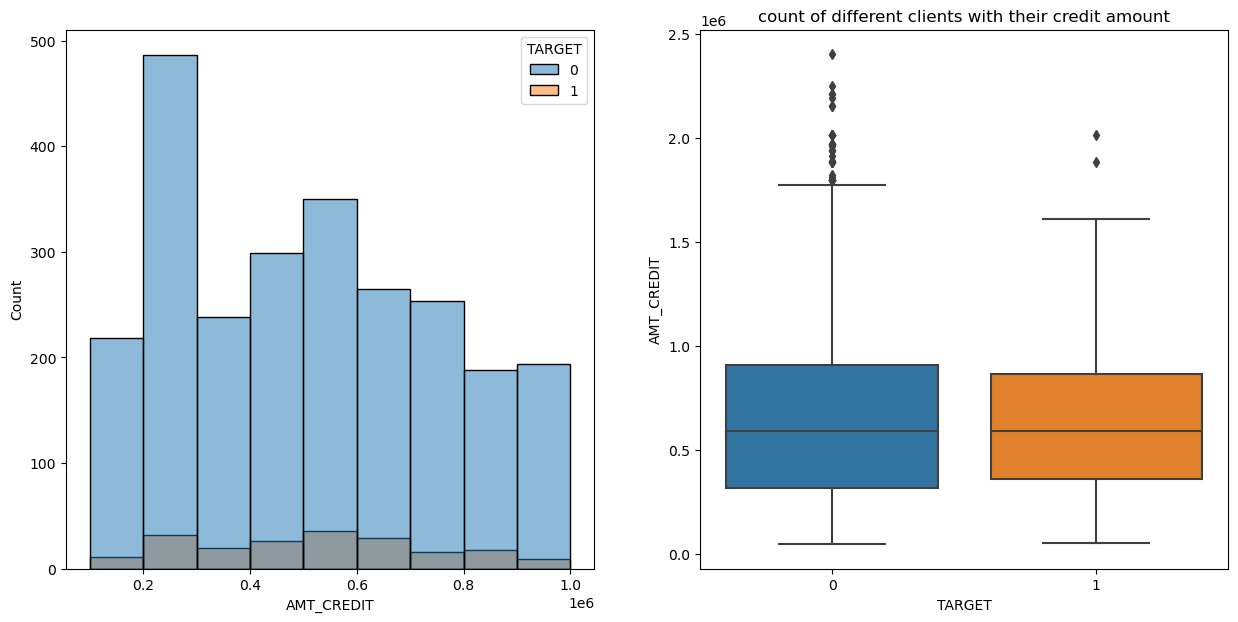

In [102]:
fig, ax = plt.subplots(1,2, figsize = (15,7))
sb.histplot(data = df_2, x = 'AMT_CREDIT', hue = 'TARGET', bins = [100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000], ax = ax[0])
sb.boxplot(data = df_2, x ='TARGET', y ='AMT_CREDIT', ax = ax[1] )
plt.title('count of different clients with their credit amount')
plt.show()

## INTERPRETATION :
* The credit amount of non - defaulter clients is between the 5 lakhs and 25 lakhs.
* The credit amount of defaulter clients is between 5 lakhs and 15 lakhs.
* There is a possibility that  non- defaulter clients having credit amount between 5 lakhs and 15 lakhs can become the defaulter ones.

# analysing target and good price


NameError: name 'df_3' is not defined

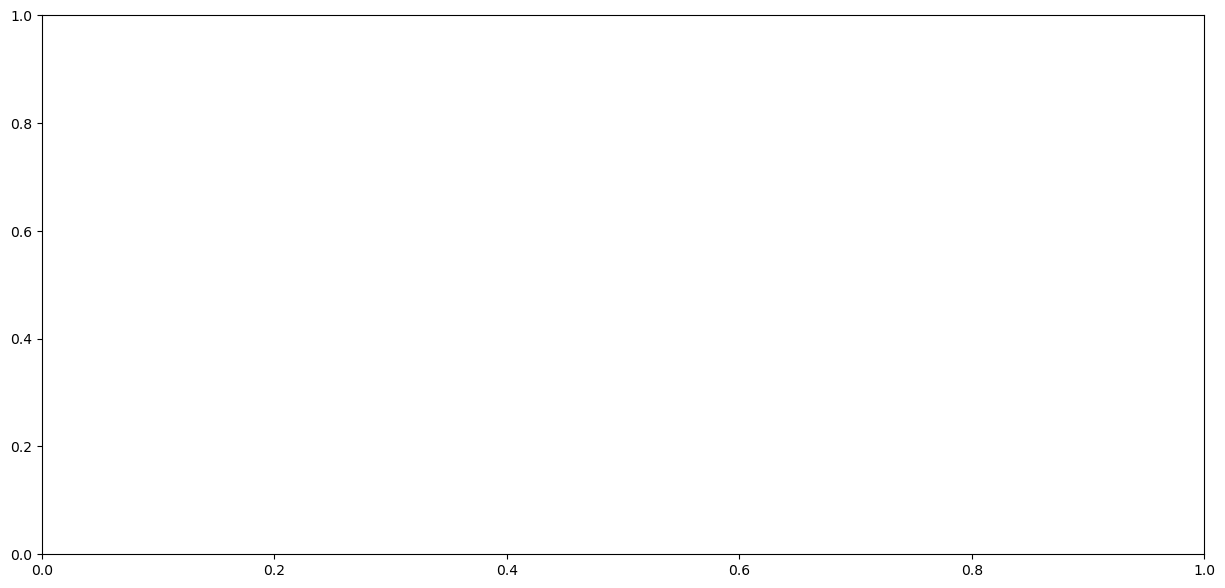

In [103]:
fig, ax = plt.subplots(figsize = (15,7))
sb.histplot(data = df_3, x = 'AMT_GOODS_PRICE', hue = 'TARGET', bins = [500000,1000000,1500000,2000000,2500000])
plt.title('count of different clients with their good price')
plt.show()

## INTERPRETATION :
* The good price  of non - defaulter clients is between the 5 lakhs and 25 lakhs.
* The good price of defaulter clients is between 50 lakhs and 15 lakhs.
* There is a possibility that  non- defaulter clients having good price between 5 lakhs and 15 lakhs can become the defaulter ones.

In [104]:
# filtering the clients which do not have car and house
df_4 = df_1[(df_1['Car'] == 'N') & (df_1['House'] == 'N')]
df_4

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
97,100115,0,Cash loans,F,N,N,0,90000.0,315000.0,315000.0,...,367,1,1,1,1,0,Laborers,2.0,SUNDAY,1
106,100125,0,Cash loans,F,N,N,0,126000.0,263686.5,238500.0,...,365243,1,0,0,1,0,Laborers,2.0,MONDAY,1
133,100155,0,Cash loans,M,N,N,0,157500.0,675000.0,675000.0,...,2899,1,1,1,1,0,Laborers,2.0,THURSDAY,1
231,100268,0,Cash loans,F,N,N,0,85500.0,225000.0,225000.0,...,1028,1,1,0,1,0,Laborers,2.0,TUESDAY,1
300,100345,0,Cash loans,F,N,N,0,157500.0,450000.0,450000.0,...,951,1,1,1,1,0,Laborers,2.0,SATURDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99910,215992,0,Cash loans,F,N,N,0,112500.0,220662.0,207000.0,...,365243,1,0,0,1,0,Laborers,2.0,FRIDAY,1
99916,215998,0,Cash loans,F,N,N,0,90000.0,187704.0,148500.0,...,2785,1,1,0,1,0,Laborers,2.0,MONDAY,1
99934,216019,0,Cash loans,M,N,N,0,135000.0,553806.0,495000.0,...,191,1,1,0,1,0,Laborers,2.0,FRIDAY,1
99953,216042,0,Cash loans,F,N,N,0,202500.0,900000.0,900000.0,...,3155,1,1,1,1,0,Laborers,2.0,TUESDAY,1


# analysing the clients which do not have car and house with their total income.

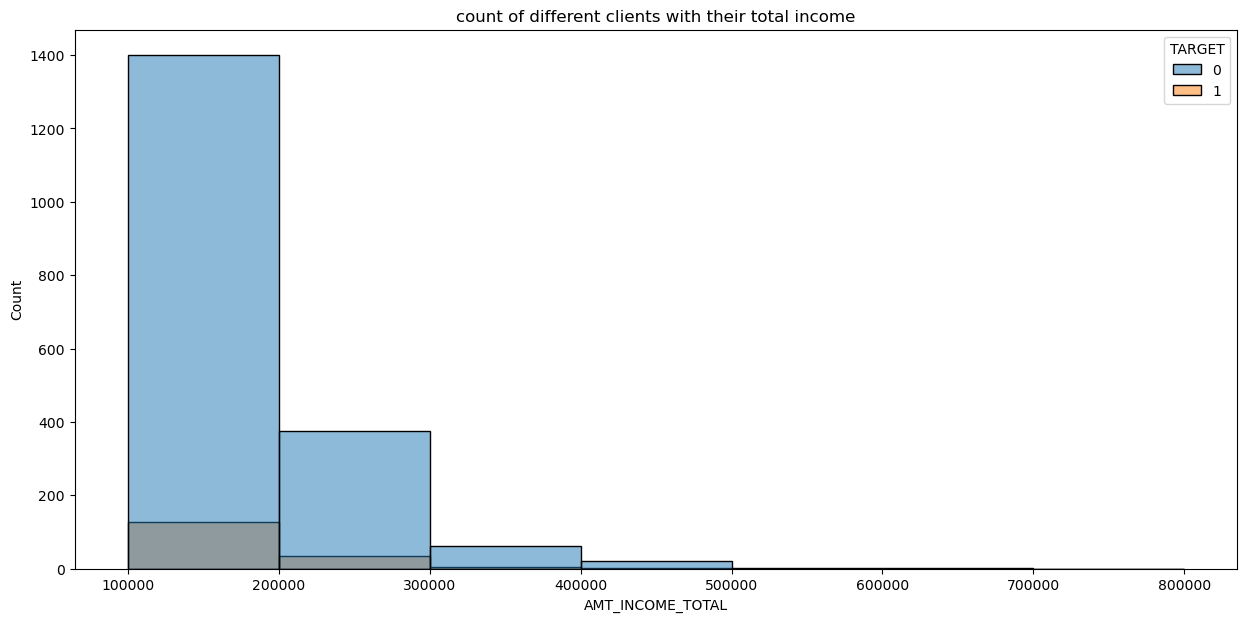

In [105]:
fig, ax = plt.subplots(figsize = (15,7))
sb.histplot(data = df_4, x = 'AMT_INCOME_TOTAL', hue = 'TARGET',bins = [100000, 200000,300000,400000,500000,600000,700000,800000])
plt.title('count of different clients with their total income')
plt.show()

## INTERPRETATION :
clients which do not have car and house :
* non- defaulter clients have total income between 1 lakh and 5 lakhs.
* defaulter clients have income between 1 lakh and 3 lakhs.
* non - defaulter clients which have total income between 1 lakh and 3 lakh can also become the defaulters.

In [106]:
df_4.groupby(['TARGET'])[['AMT_INCOME_TOTAL']].mean()

,AMT_INCOME_TOTAL
TARGET,
0,137229.863954
1,137687.450199


In [107]:
df_4.groupby(['TARGET'])[['AMT_INCOME_TOTAL']].median()

,AMT_INCOME_TOTAL
TARGET,
0,121500.0
1,130500.0


In [108]:
df_4.groupby(['TARGET'])[['AMT_INCOME_TOTAL']].apply(lambda x : x.mode())

,,AMT_INCOME_TOTAL
TARGET,,
0,0,135000.0
1,0,112500.0


# analysing the clients which have total income between 1 lakh and 5 lakhs.

In [ ]:
df_5 = df_4[(df_4['AMT_INCOME_TOTAL'] >= 100000) & (df_4['AMT_INCOME_TOTAL'] <= 500000 )]
df_5

# analysing the credit amount 

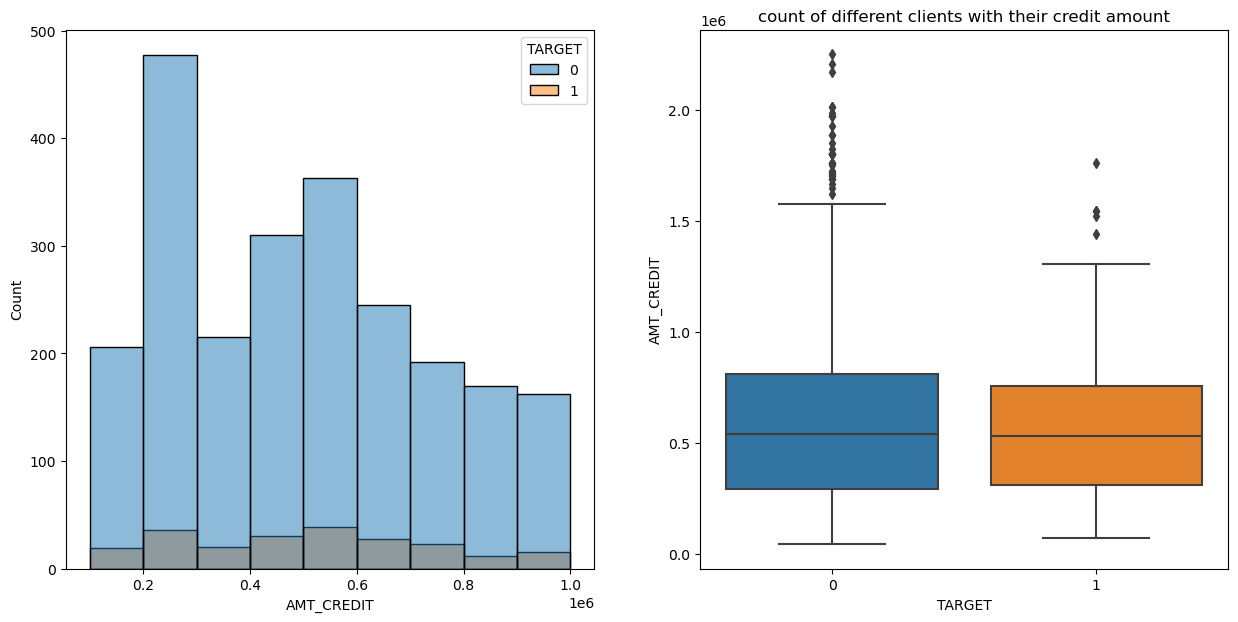

In [111]:
fig, ax = plt.subplots(1,2,figsize = (15,7))
sb.histplot(data = df_4, x = 'AMT_CREDIT', hue = 'TARGET', ax= ax[0], bins = [100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000])#,1200000,1400000, 1600000,1800000,2000000])
sb.boxplot(data = df_4, x ='TARGET', y ='AMT_CREDIT', ax = ax[1] )
plt.title('count of different clients with their credit amount')
plt.show()

## INTERPRETATION :
* non - defaulter clients have credit amount between 2 lakhs and 20 lakhs.
* defaulter clients have credit amount between 2 lakhs and 16 lakhs.
* there is a possibility that non-defaulter clients having credit amount between 2 lakhs and 16 lakhs can become the defaulters.

# analysing the good price of clients haaving total income between 1 lakh and 5 lakhs

In [ ]:
fig, ax = plt.subplots(figsize = (15,7))
sb.histplot(data = df_5, x = 'AMT_GOODS_PRICE', hue = 'TARGET', bins = [500000,1000000,1500000,2000000,2500000])
plt.title('count of different clients with their good price having income between 1 lakh and 5 lakhs')
plt.show()

## INTERPRETATION:
* clients having amount of good price between 5 lakhs and 25 lakhs are non-defaulters.
* clients havinh amount of good price between 5 lakhs nad 15 lakhs are defaulters.
* non-defaulter clients having good price between 5 lakh and 15 lakhs can become the defaulters.

In [ ]:
# analysing the clients having either car or house

In [112]:
df_6 = df_1[((df_1['Car'] == 'Y') & (df_1['House'] == 'N')) | ((df_1['Car'] == 'N') & (df_1['House'] == 'Y'))]
df_6

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,454500.0,...,1588,1,1,1,1,0,Laborers,2.0,WEDNESDAY,1
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,913500.0,...,365243,1,0,0,1,0,Laborers,2.0,WEDNESDAY,1
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,135000.0,...,365243,1,0,0,1,0,Laborers,2.0,FRIDAY,1
12,100016,0,Cash loans,F,N,Y,0,67500.000,80865.0,67500.0,...,2717,1,1,1,1,0,Laborers,2.0,FRIDAY,1
14,100018,0,Cash loans,F,N,Y,0,189000.000,773680.5,679500.0,...,203,1,1,0,1,0,Laborers,2.0,MONDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99966,216056,0,Cash loans,F,N,Y,0,114750.000,283419.0,234000.0,...,4338,1,1,1,1,0,Laborers,2.0,MONDAY,1
99981,216072,0,Cash loans,F,N,Y,0,35100.000,294322.5,243000.0,...,365243,1,0,0,1,0,Laborers,2.0,SUNDAY,1
99982,216073,0,Cash loans,F,N,Y,0,108000.000,432661.5,373500.0,...,365243,1,0,0,1,0,Laborers,2.0,WEDNESDAY,1
99989,216080,0,Cash loans,F,N,Y,0,180000.000,1546020.0,1350000.0,...,2250,1,1,0,1,0,Laborers,2.0,MONDAY,1


# analysing the income of clients having either car or house

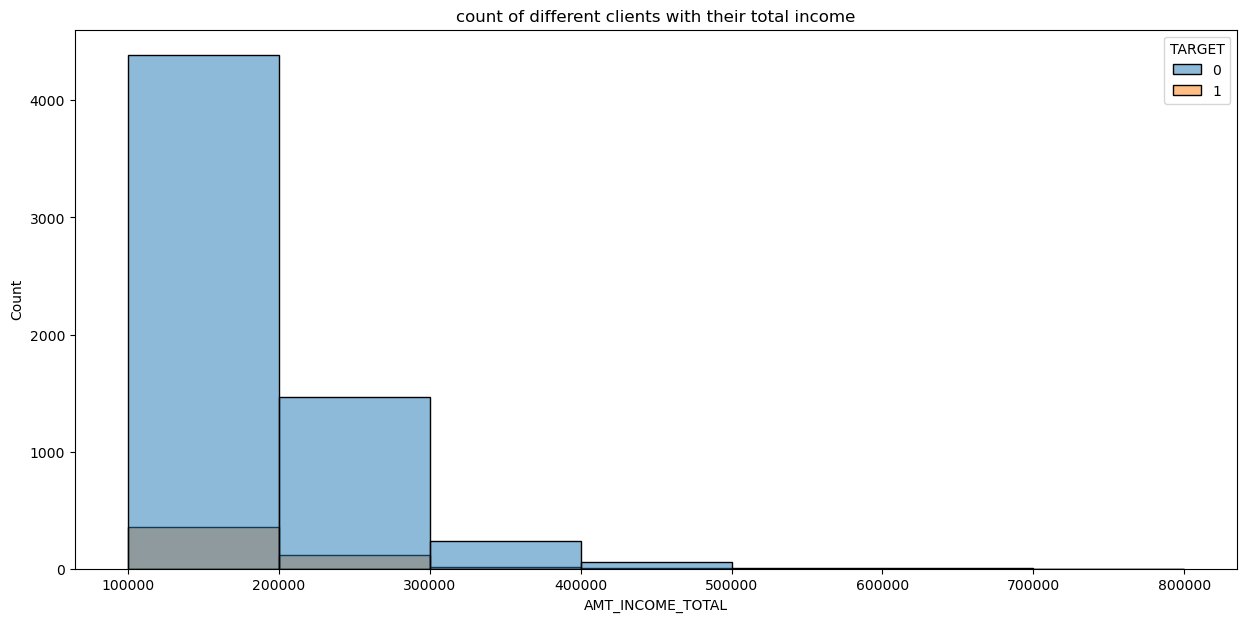

In [113]:
fig, ax = plt.subplots(figsize = (15,7))
sb.histplot(data = df_6, x = 'AMT_INCOME_TOTAL', hue = 'TARGET',bins = [100000, 200000,300000,400000,500000,600000,700000,800000])
plt.title('count of different clients with their total income')
plt.show()

## INTERPRETATION :
 clients which either have car or house are :
* non- defaulters with total income between 1 lakh and 5 lakhs.
* defaulters with total income between 1 lakh and 3 lakhs.
non-defaulter clients having income between 1 lakh and 3 lakhs can become defaulter ones.
    

# analysing the clients having either house or car and total income between 1 lakh and 5 lakhs.

In [ ]:
df_7 = df_6[(df_6['AMT_CREDIT'] >= 100000) & (df_6['AMT_CREDIT'] <=500000)]
df_7

# analysing the type of client and loan amount

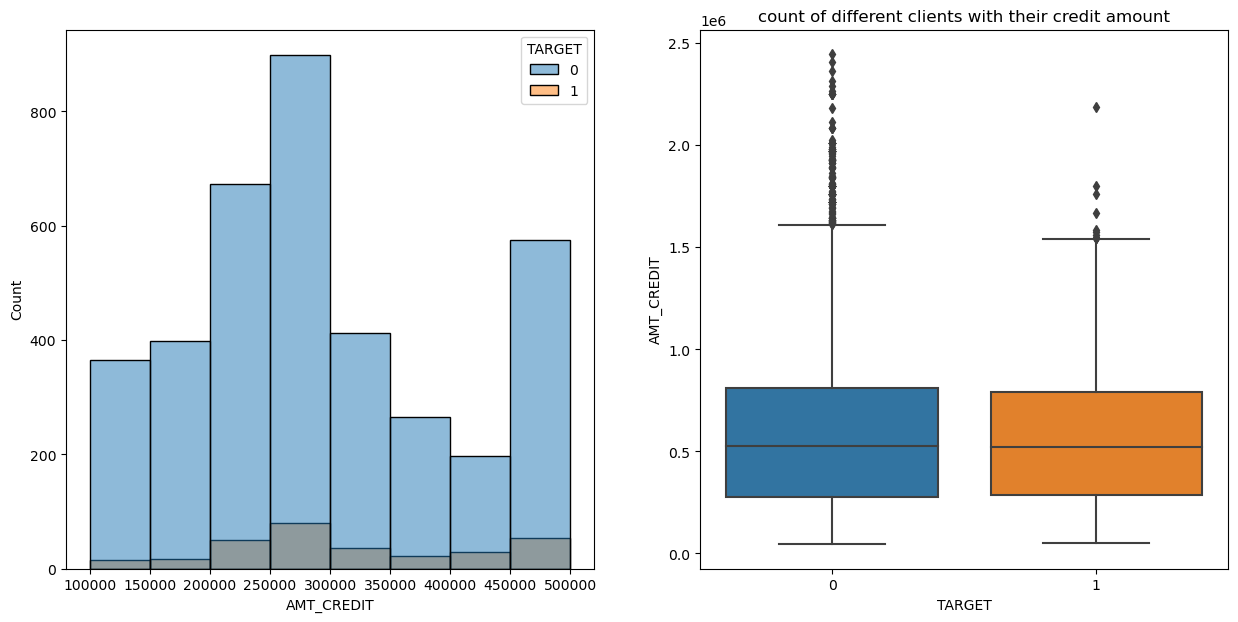

In [116]:
fig, ax = plt.subplots(1,2,figsize = (15,7))
sb.histplot(data = df_6, x = 'AMT_CREDIT', hue = 'TARGET',ax= ax[0], bins = [100000, 150000,200000,250000,300000,350000,400000,450000,500000])
sb.boxplot(data = df_6, x ='TARGET', y ='AMT_CREDIT', ax = ax[1] )
plt.title('count of different clients with their credit amount')
plt.show()

## INTERPRETATION :
* clients wether they are defaulter and non- defaulter have credit amount between 1 lakh and 5 lakh.

# analysing the good price

In [ ]:
fig, ax = plt.subplots(figsize = (15,7))
sb.histplot(data = df_7, x = 'AMT_GOODS_PRICE', hue = 'TARGET', bins = [50000,100000,150000,200000,250000, 300000,350000,400000])
plt.title('count of different clients with their good price having income between 1 lakh and 5 lakhs')
plt.show()

## INTERPRETATION :
* non-defaulter clients have good price amount between 50 thousand and 4 lakh.
* defaulters have amount of good price between 1 lakh and 4 lakhs.
* maximum defaulters have good price amount between 2 lakhs and 2.5 lakhs, therefore non-defaulter clients having good price between 2 lakhs and 2.5 lakhs can become the defaulters.